# Biological Data Project - 2020-21

Group 8: Luca Dal Zotto, Giuliano Squarcina, Francesco Ferretto

# Point Colaboratory to Google Drive

Since we used a python notebook, the output of each cell is saved and can be read by the professors. However, if they desire to re-run some parts of the code, an easy way is to save the drive folder that we provided in your personal Drive, and point Colaboratory to that folder. To do so, simply run the following cell and follow the easy procedure shown. 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



Then modify this second cell according to your folder path, similarly to what we have done.

In [ ]:
# datapath = '/content/gdrive/My Drive/^DATA SCIENCE/^Biological Data/PROJECT/models/' # Luca
# datapath = '/content/gdrive/My Drive/Data Science - Unipd/II Year/I Semester/Biological Data/Project/PROJECT/models/' # Giuliano
# datapath = '/content/gdrive/My Drive/PROJECT/models/' # Francesco

datapath = '/content/gdrive/My Drive/MODIFY_THIS_PART_ACCORDING_TO_YOUR_PATH/PROJECT/models/' # PROFESSOR

# I PART

In this notebook, we report the results of the 2 best models. To be precise, in the Blast search, we used E-value threshold = 0.001 and maximum number of hits = 50. The target dataset is UniRef90. For what concerns the psi-blast model, we performed 2 iterations and used an E-value threshold of 0.0001. 

For completeness, the results obtained with other parameters are reported in other additional notebooks in the folder PROJECT/Other noteboooks, where you can find also a README file with a precise description.

# Building models

Data used for this part is saved in the folder PROJECT/models.

The first 4 exercises have been solved using online services. They are described in details in the PDF report. Here I briefly report the procedure followed

## Ex 1: ground truth

SwissProt proteins should be in the file uniprot_sprot.fasta

Proteins presenting our domain can be found here: http://www.ebi.ac.uk/interpro/entry/pfam/PF08543/protein/reviewed/#table

## Ex 2: BLAST search

Go to https://www.uniprot.org/blast/ and select the target database, E-threshold and hte maximum number of hits. 

Files have been saved in the format BLAST_targetdatabase.fasta.

## Ex 3: MSA

We used Clustal Omega (https://www.ebi.ac.uk/Tools/msa/clustalo/).

As output format we used fasta.

## Ex 4: if necessary, edit the MSA

We visually inspected the MSA using JalView, but in almost all cases, the alignment was satisfactory, in the sense that there were not evident misaligned sequences or other form of noise which could reduce the performances of the models.

## Ex 5: build a PSSM model

We run psiblast from the command line using as input the MSA obtained with clustal omega

`./binx/ncbi-blast-2.11.0+/bin/psiblast -in_msa ./PROJECT/clustal_omega_uniref90_50hits.fasta -db ./data/msa/uniprot_sprot.fasta -out ./PROJECT/output_psiblast_uniref90_50hits.out -out_pssm ./PROJECT/pssm_model_uniref90_50hits.pssm`

The output model is pssm_model_uniref90_50hits.pssm.

## Ex 6 build a HMM model

We run hmmbuild from the command line using as input the MSA obtained with clustal omega

`./binx/hmmer-3.3.1/src/hmmbuild ./PROJECT/hmm_model_uniref90_50hits.hmm ./PROJECT/clustal_omega_uniref90_50hits.fasta`

The output model is hmm_model_uniref90_50hits.hmm.

## Ex 7: find significant hits

From the command line, we run HMM-SEARCH using the model just created:

`hmmsearch --tblout ./PROJECT/hmm_search_uniref90_50hits.hmmer_tblout --domtblout ./PROJECT/hmm_search_uniref90_50hits.hmmer_domtblout ./PROJECT/hmm_model_uniref90_50hits.hmm ./data/msa/uniprot_sprot.fasta > ./PROJECT/hmm_search_uniref90_50hits.hmmer_align`

THe output we will read is hmm_search_uniref90_50hits.hmmer_domtblout.

We also run PSI-BLAST performing 2 iterations and setting the E-value threshold equal to 0.0001:

`./binx/ncbi-blast-2.11.0+/bin/psiblast -in_pssm ./PROJECT/pssm_model_uniref90_50hits.pssm -db ./data/msa/uniprot_sprot.fasta -outfmt 6 -num_iterations 2 -evalue 0.0001 > ./PROJECT/psiblast_search_uniref90_50hits_2iter_eval00001.txt`

OBS: we used 6 as output format, following the instructions found here: http://www.metagenomics.wiki/tools/blast/blastn-output-format-6

The output file is psiblast_search_uniref90_50hits_2iter_eval00001.txt.

## Ex 8: sequence matching evaluation

#### Read the ground truth file


In [ ]:
!pip install Bio
from Bio import SeqIO

     |████████████████████████████████| 71kB 3.2MB/s 
     |████████████████████████████████| 2.3MB 8.1MB/s 


Find the proteins containing the target domain (PF08543) in SwissProt -> set of actual positives 


In [ ]:
# !pip install Bio
# from Bio import SeqIO
path = datapath + 'protein-matching-PF08543.fasta'
protein_matching = SeqIO.parse(path,'fasta')

list_protein_containing_domain = []
for sequence in protein_matching:
    # print(sequence)
    name = sequence.id # name is in the form A1ADT5|reviewed|Pyridoxine/pyridoxal/pyridoxamine
    # print('name ->', name, '\n')
    list_protein_containing_domain.append(name.split('|')[0])

set_protein_containing_domain = set(list_protein_containing_domain) # this is the ground truth
print(f"Number of proteins in SwissProt containing the target domain: {len(list_protein_containing_domain)}")
# this is the total number of protein in SwissProt
print(f"Actual positives: {set_protein_containing_domain}")

Number of proteins in SwissProt containing the target domain: 150
Actual positives: {'O94266', 'Q7CIR8', 'Q2SXQ4', 'Q08224', 'Q7WII1', 'O85786', 'Q66A50', 'Q5PNC8', 'Q5PIK8', 'B7UGB9', 'P53727', 'P82197', 'Q7MGA4', 'Q02DJ3', 'Q5M731', 'Q08975', 'Q83KY1', 'A1ADT5', 'O00764', 'Q48BL6', 'A7ZPL9', 'Q141E8', 'B7MHS2', 'Q39I40', 'P9WG76', 'P40191', 'P44690', 'Q6D5V1', 'Q88C26', 'B3H2H2', 'Q1CIM6', 'B7V753', 'Q2L1P5', 'O31620', 'Q87TZ6', 'Q9ZL00', 'P40192', 'Q0BSF0', 'Q7N3W7', 'O48881', 'Q4K3F6', 'B7LCG3', 'Q7W6K7', 'Q6GEY2', 'A7N5Q6', 'Q3K4B8', 'O46560', 'A8A2R4', 'B5YZW5', 'O94265', 'O67772', 'B1XA89', 'P9WG77', 'Q51892', 'Q0THJ1', 'P55882', 'Q5E345', 'Q57LS3', 'Q63SC2', 'Q8CTQ7', 'Q5HRG7', 'Q6AFC1', 'B7NPV5', 'P39610', 'B7M6S8', 'Q3YZC3', 'Q8K183', 'Q55EK9', 'P76422', 'A6VEZ4', 'A5UA83', 'Q8FFB5', 'A5WB73', 'Q8ZPM8', 'B1IX53', 'Q9ZBL1', 'Q57688', 'P44697', 'Q9HT57', 'A6VNE5', 'B2TX08', 'B7N609', 'B1JFM7', 'B2JCI0', 'Q8XBL0', 'Q1J237', 'C3K4G7', 'Q9USL6', 'Q1BXQ7', 'O14242', 'P56904', 'Q6NG

Find all the proteins in the target database (uniprot_sprot.fasta) -> complete ground truth (actual positives + actual negatives)

In [ ]:
path = datapath + 'uniprot_sprot.fasta'
all_sequences = SeqIO.parse(path, 'fasta')

list_all_sequences = []
for sequence in all_sequences:
    name = sequence.id # name is in the form sp|Q6GZX4|001R_FRG3G
    list_all_sequences.append(name.split('|')[1])

num_sequences = len(set(list_all_sequences))
print(f"Total number of proteins in SwissProt: {num_sequences}")

Total number of proteins in SwissProt: 563972


#### Read the output file of the psi-blast search

In [ ]:
def read_psiblast(path):
    ''' Create a dictionary having as key the protein ID and as value the set of
    tuples (start, end) representing the position of our domain in that protein
    (we assume that the domain may be present in more than one position). '''
    
    positions = {}
    with open(path, 'r') as f:
        for line in f:
            if line:
                line = line.replace('|', ' ')
                (_, _, id, _, _, length, _, gapopen, _, _, 
                    start, end, evalue, bitscore) = line.split()
                    
                positions.setdefault(id, set()).add((start, end)) 
    return positions

In [ ]:
path = datapath + 'psiblast_search_uniref90_50hits_2iter_eval00001.txt'
positions_psiblast = read_psiblast(path)
print(f'Number of distint proteins found with psi-blast: {len(positions_psiblast)}')

Number of distint proteins found with psi-blast: 168


In [ ]:
positions_psiblast

{'A1A6H3': {('243', '368')},
 'A1ADT5': {('14', '278'), ('89', '265')},
 'A1AV12': {('73', '298')},
 'A2BLC0': {('248', '487')},
 'A3N2D3': {('62', '254')},
 'A5UA83': {('47', '256'), ('80', '193')},
 'A5WB73': {('5', '271')},
 'A6VEZ4': {('50', '256')},
 'A6VNE5': {('50', '254')},
 'A7N5Q6': {('75', '255'), ('77', '252')},
 'A7ZPL9': {('14', '278'), ('89', '265')},
 'A8A2R4': {('14', '278'), ('89', '265')},
 'B0KR83': {('60', '271')},
 'B0UUD2': {('47', '254')},
 'B1IX53': {('14', '278'), ('89', '265')},
 'B1JFM7': {('60', '271')},
 'B1LML3': {('14', '278'), ('89', '265')},
 'B1XA89': {('14', '278'), ('89', '265')},
 'B2JCI0': {('37', '255')},
 'B2TX08': {('14', '278'), ('89', '265')},
 'B3E5M9': {('73', '298')},
 'B3H2H2': {('62', '254')},
 'B5YZW5': {('14', '278'), ('89', '265')},
 'B6I4Z5': {('14', '278'), ('89', '265')},
 'B7LCG3': {('14', '278'), ('89', '265')},
 'B7LL66': {('14', '278'), ('89', '265')},
 'B7M6S8': {('14', '278'), ('89', '265')},
 'B7MHS2': {('14', '278'), ('89',

#### Read the output file of the hmm search

In [ ]:
def read_hmm(path):

    ''' Create a dictionary having as key the protein ID and as value the set of
    tuples (start, end) representing the position of our domain in that protein
    (we assume that the domain may be present in more than one position). '''
  
    positions = {}
    with open(path,'r') as f:
        for line in f:
            if line[0] != "#": # and line[0] != "-":
              line=line.replace('|', ' ')
              (_, id, _, _, tlen, _, _, qlen,  
              full_seq_evalue, full_seq_score, _, _, _, dcevalue, dievalue, dscore, _, _, _ , 
              align_from, align_to, env_from, env_to, accuracy, description) = line.strip().split()[:25]
            
              positions.setdefault(id, set()).add( (align_from, align_to) )
   
    return positions


In [ ]:
path = datapath + 'hmm_search_uniref90_50hits.hmmer_domtblout'
positions_hmm = read_hmm(path)
print(f'Number of distint proteins found with hmm: {len(positions_hmm)}')

Number of distint proteins found with hmm: 159


In [ ]:
positions_hmm

{'A1A6H3': {('244', '322')},
 'A1ADT5': {('89', '269')},
 'A3N2D3': {('76', '252')},
 'A5UA83': {('77', '182')},
 'A5WB73': {('79', '257')},
 'A6H162': {('140', '179')},
 'A6VEZ4': {('79', '259')},
 'A6VNE5': {('75', '181')},
 'A7N5Q6': {('78', '254')},
 'A7ZPL9': {('89', '269')},
 'A8A2R4': {('89', '269')},
 'A8AYI7': {('150', '198')},
 'A9CES5': {('195', '247')},
 'A9VLH1': {('122', '202')},
 'B0KR83': {('79', '257')},
 'B0R808': {('176', '244')},
 'B0UUD2': {('76', '253')},
 'B1IX53': {('89', '269')},
 'B1JFM7': {('79', '257')},
 'B1LML3': {('89', '269')},
 'B1XA89': {('89', '269')},
 'B2JCI0': {('59', '246')},
 'B2TX08': {('89', '269')},
 'B3H2H2': {('76', '252')},
 'B5YZW5': {('89', '269')},
 'B6I4Z5': {('89', '269')},
 'B7LCG3': {('89', '269')},
 'B7LL66': {('89', '268')},
 'B7M6S8': {('89', '269')},
 'B7MHS2': {('89', '269')},
 'B7MY71': {('89', '269')},
 'B7N609': {('89', '269')},
 'B7NPV5': {('89', '269')},
 'B7UGB9': {('89', '269')},
 'B7V753': {('79', '259')},
 'C3K4G7': {('

#### Model evaluation

In [ ]:
# !pip install Bio
# from Bio import SeqIO
import math
import json
import pandas as pd
import numpy as np

#### Useful functions to compute metrics

In [ ]:
# import math
def metrics(true_positive, true_negative, false_positive, false_negative):
  
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_negative + false_positive)
    precision = true_positive / (true_positive + false_positive)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    weighted_accuracy = (sensitivity + specificity) / 2
    mcc_numerator = (true_positive * true_negative) - (false_positive * false_negative)
    mcc_denominator_squared = (true_positive + false_positive) * (true_positive + false_negative) * (true_negative + false_positive) * (true_negative + false_negative)
    mcc = mcc_numerator / math.sqrt(mcc_denominator_squared)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    return {
            "Accuracy": accuracy,
            "Weighted accuracy": weighted_accuracy,
            "Precision": precision,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "MCC": mcc,
            "F-score": f1_score
            }


In [ ]:
def metrics_results(predictions, actual_positives, ground_truth_size):
    """
    predictions = dict of the type {'A0A0H2WZY4': {('167', '228')}, ... }
    actual_positives = set of sequences containing PF08543
    ground_truth_size = number of actual positives + actual negatives (= SwissPort size)
    """
    predicted_sequences = set(predictions.keys())
    
    #take intersection of predicted positive & actual positive to get TP
    true_positive = len(predicted_sequences & actual_positives)
     
    #remove from actual positive the TP to get FN 
    false_negative = len(actual_positives) - true_positive

    #remove from predicted positive the TP to get FP
    false_positive = len(predicted_sequences) - true_positive

    #the complement to total n°obs are TN
    true_negative = ground_truth_size - true_positive - false_positive - false_negative
    
    conf_matrix = pd.DataFrame(np.array([[true_positive, false_positive], [false_negative, true_negative]]), 
                               index=['Positive pred', 'Negative pred'], 
                               columns=['Actual positive', 'Actual negative'])

    return conf_matrix, metrics(true_positive, true_negative, false_positive, false_negative)  

#### Evaluate psi-blast

In [ ]:
conf_matrix_psiblast, metric_results_psiblast = metrics_results(positions_psiblast, set_protein_containing_domain, num_sequences )
print('CLASSIFICATION METRICS')
for k in metric_results_psiblast:
    print(f'{k}: {metric_results_psiblast[k]:.3}')
    
print('\nCONFUSION MATRIX')    
conf_matrix_psiblast

CLASSIFICATION METRICS
Accuracy: 1.0
Weighted accuracy: 0.997
Precision: 0.887
Sensitivity: 0.993
Specificity: 1.0
MCC: 0.939
F-score: 0.937

CONFUSION MATRIX


,Actual positive,Actual negative
Positive pred,149,19
Negative pred,1,563803


#### Evaluate hmm

In [ ]:
conf_matrix_hmm, metric_results_hmm = metrics_results(positions_hmm, set_protein_containing_domain, num_sequences )
print('CLASSIFICATION METRICS')
for k in metric_results_hmm:
    print(f'{k}: {metric_results_hmm[k]:.3}')
    
print('\nCONFUSION MATRIX')    
conf_matrix_hmm

CLASSIFICATION METRICS
Accuracy: 1.0
Weighted accuracy: 0.967
Precision: 0.881
Sensitivity: 0.933
Specificity: 1.0
MCC: 0.907
F-score: 0.906

CONFUSION MATRIX


,Actual positive,Actual negative
Positive pred,140,19
Negative pred,10,563803


## Ex 9: position matching evaluation

#### Read the ground truth file for the positions

In [ ]:
path = datapath + 'protein-matching-PF08543.json'

with open(path, "r") as file:
    position_file = json.load(file)
    
ground_truth_positions = {}
for elem in position_file:
    id = elem['metadata']['accession']
    length = elem['metadata']['length']

    ground_truth_positions.setdefault(id, dict()).update([('length', length), ('positions', set())])

    for entry in elem['entries']:
        if entry['accession']=='PF08543':
            for location in entry['entry_protein_locations']:

                position_tuple=(str(location['fragments'][0]['start']),
                                str(location['fragments'][0]['end']))

                ground_truth_positions[id]['positions'].add(position_tuple)

In [ ]:
print(len(ground_truth_positions))

150


In [ ]:
for item in ground_truth_positions.items():
  print(item)

('A1ADT5', {'length': 283, 'positions': {('88', '265')}})
('A3N2D3', {'length': 286, 'positions': {('64', '256')}})
('A5UA83', {'length': 288, 'positions': {('71', '264')}})
('A5WB73', {'length': 290, 'positions': {('74', '257')}})
('A6VEZ4', {'length': 288, 'positions': {('77', '259')}})
('A6VNE5', {'length': 286, 'positions': {('62', '259')}})
('A7N5Q6', {'length': 289, 'positions': {('75', '260')}})
('A7ZPL9', {'length': 283, 'positions': {('88', '265')}})
('A8A2R4', {'length': 283, 'positions': {('88', '265')}})
('B0KR83', {'length': 290, 'positions': {('76', '257')}})
('B0UUD2', {'length': 286, 'positions': {('64', '260')}})
('B1IX53', {'length': 283, 'positions': {('88', '265')}})
('B1JFM7', {'length': 290, 'positions': {('76', '257')}})
('B1LML3', {'length': 283, 'positions': {('88', '265')}})
('B1XA89', {'length': 283, 'positions': {('88', '265')}})
('B2JCI0', {'length': 287, 'positions': {('74', '261')}})
('B2TX08', {'length': 283, 'positions': {('88', '265')}})
('B3H2H2', {'l

#### Useful functions to compute metrics

In [ ]:
def buildPositionSet(position_set):
    """
    position_set = {('88', '265'), ...}
    return a set {88, 89, ..., 265, ...}
    """
    positions = set()
    for pos in position_set: # pos is a tuple of two strings
        p = [i for i in range( int(pos[0]), int(pos[1])+1 )]
        positions = positions.union(p)
    return positions

In [ ]:
def evaluatePositions(predicted_positions, ground_truth_positions):
    """
    predicted_positions: {'A0A0H2WZY4': {('162', '278')}, ...}
    ground_truth_positions: {'A1ADT5': {'length': 283, 'positions': {('88', '265')}}, ...}
    
    """
    global_tp, global_fp, global_fn, global_tn = [], [], [], []
    
    # scores per sequence
    log_scores = []

    for id in predicted_positions:
        if id in ground_truth_positions:
            sequence_length = ground_truth_positions[id]['length']
            ground_truth_positions_seq = buildPositionSet(ground_truth_positions[id]['positions']) 
        
            predicted_positions_seq = buildPositionSet(predicted_positions[id])    

            overlapping_positions  = ground_truth_positions_seq & predicted_positions_seq

            true_positive = len(overlapping_positions)
            false_positive = len(predicted_positions_seq - overlapping_positions)
            false_negative = len(ground_truth_positions_seq -  overlapping_positions)
            true_negative  = sequence_length - true_positive - false_positive - false_negative

            global_tp.append(true_positive)
            global_fp.append(false_positive)
            global_fn.append(false_negative)
            global_tn.append(true_negative)
            
            log_scores.append(metrics(true_positive, true_negative, false_positive, false_negative))

                   
    metrics_global = metrics(true_positive=sum(global_tp), true_negative=sum(global_tn), 
                             false_positive=sum(global_fp), false_negative=sum(global_fn))
    
    conf_matrix = pd.DataFrame(np.array([[sum(global_tp), sum(global_fp)], [sum(global_fn), sum(global_tn)]]), 
                               index=['Positive pred', 'Negative pred'], 
                               columns=['Actual positive', 'Actual negative'])
    
    return metrics_global, log_scores, conf_matrix

#### Evaluate psi-blast

In [ ]:
metrics_global_psiblast, log_score_psiblast, conf_matrix_psiblast_pos = evaluatePositions(positions_psiblast, ground_truth_positions)

In [ ]:
print('CLASSIFICATION METRICS')
for k in metrics_global_psiblast:
    print(f'{k}: {metrics_global_psiblast[k]:.3}')
print('\nCONFUSION MATRIX')    
conf_matrix_psiblast_pos

CLASSIFICATION METRICS
Accuracy: 0.894
Weighted accuracy: 0.86
Precision: 0.871
Sensitivity: 0.981
Specificity: 0.739
MCC: 0.772
F-score: 0.923

CONFUSION MATRIX


,Actual positive,Actual negative
Positive pred,28997,4302
Negative pred,556,12166


In [ ]:
log_score_psiblast

[{'Accuracy': 0.9837618403247632,
  'F-score': 0.9761904761904763,
  'MCC': 0.964154508340555,
  'Precision': 0.9609375,
  'Sensitivity': 0.9919354838709677,
  'Specificity': 0.9796334012219959,
  'Weighted accuracy': 0.9857844425464819},
 {'Accuracy': 0.975095785440613,
  'F-score': 0.9740518962075848,
  'MCC': 0.9513249577937193,
  'Precision': 0.9494163424124513,
  'Sensitivity': 1.0,
  'Specificity': 0.9532374100719424,
  'Weighted accuracy': 0.9766187050359711},
 {'Accuracy': 0.9492753623188406,
  'F-score': 0.9722222222222222,
  'MCC': 0.7001875636265357,
  'Precision': 0.953307392996109,
  'Sensitivity': 0.9919028340080972,
  'Specificity': 0.5862068965517241,
  'Weighted accuracy': 0.7890548652799106},
 {'Accuracy': 0.9492753623188406,
  'F-score': 0.9722222222222222,
  'MCC': 0.7001875636265357,
  'Precision': 0.953307392996109,
  'Sensitivity': 0.9919028340080972,
  'Specificity': 0.5862068965517241,
  'Weighted accuracy': 0.7890548652799106},
 {'Accuracy': 0.9492753623188406

#### Evaluate hmm

In [ ]:
metrics_global_hmm, log_score_hmm, conf_matrix_hmm_pos = evaluatePositions(positions_hmm, ground_truth_positions)

In [ ]:
print('CLASSIFICATION METRICS')
for k in metrics_global_hmm:
    print(f'{k}: {metrics_global_hmm[k]:.3}')
print('\nCONFUSION MATRIX')    
conf_matrix_hmm_pos

CLASSIFICATION METRICS
Accuracy: 0.936
Weighted accuracy: 0.943
Precision: 0.98
Sensitivity: 0.919
Specificity: 0.967
MCC: 0.867
F-score: 0.948

CONFUSION MATRIX


,Actual positive,Actual negative
Positive pred,25623,511
Negative pred,2272,14980


In [ ]:
log_score_hmm

[{'Accuracy': 0.9571428571428572,
  'F-score': 0.9570552147239264,
  'MCC': 0.9142933302552124,
  'Precision': 0.9590163934426229,
  'Sensitivity': 0.9551020408163265,
  'Specificity': 0.9591836734693877,
  'Weighted accuracy': 0.9571428571428571},
 {'Accuracy': 0.9708029197080292,
  'F-score': 0.9674796747967479,
  'MCC': 0.9410160027629978,
  'Precision': 0.9635627530364372,
  'Sensitivity': 0.9714285714285714,
  'Specificity': 0.9702970297029703,
  'Weighted accuracy': 0.9708628005657709},
 {'Accuracy': 0.9210526315789473,
  'F-score': 0.9574036511156186,
  'MCC': 0.4191327894408768,
  'Precision': 0.959349593495935,
  'Sensitivity': 0.9554655870445344,
  'Specificity': 0.47368421052631576,
  'Weighted accuracy': 0.7145748987854251},
 {'Accuracy': 0.9182156133828996,
  'F-score': 0.9552845528455285,
  'MCC': 0.48277433894492416,
  'Precision': 0.9670781893004116,
  'Sensitivity': 0.9437751004016064,
  'Specificity': 0.6,
  'Weighted accuracy': 0.7718875502008031},
 {'Accuracy': 0.97

# II PART


The main goal is to look at functional and structural aspects/properties of the entire protein family.

In order to achive such goal is more important the capacity of the model to identify the proteins which actually contain the *target domain* rather than the capacity to identify the residues' position of *target domain*.

Hence, referring to the PSI-BLAST's and HMM's performances presented before, the PSI-BLAST model should be preferred.

# Dataset definitions

### family_sequences
save the output of best model (psi-blast)

In [ ]:
dataset = datapath + 'dataset_bestmodel.txt'

# with open(dataset, 'w') as f:
#     f.writelines("%s\n" % id for id in list(positions_psiblast.keys()))

In [ ]:
# datapath2 = '/content/gdrive/My Drive/^DATA SCIENCE/^Biological Data/PROJECT/structure/' # Luca
# datapath2 = '/content/gdrive/My Drive/Data Science - Unipd/II Year/I Semester/Biological Data/Project/PROJECT/structure/' # Giuliano
# datapath2 = '/content/gdrive/My Drive/PROJECT/structure/' # Francesco

datapath2 = '/content/gdrive/My Drive/MODIFY_THIS_PART_ACCORDING_TO_YOUR_PATH/PROJECT/structure/' # PROFESSOR

In [ ]:
dataset = datapath2 + 'dataset_bestmodel.txt'

# with open(dataset, 'w') as f:
#     f.writelines("%s\n" % id for id in list(positions_psiblast.keys()))

## family_structures
Here we used the file `uniprot_segments_observed.tsv`: a summary of the PDBe to UniProt residue level mapping, showing the start
and end residues of the mapping using SEQRES, PDB
sequence (observed residues) and UniProt numbering. As suggested by the prof, here we have all observed data, so there is no None value.

In [ ]:
# complete swissprot
sp_database = datapath + 'uniprot_sprot.fasta'

all_sequences = SeqIO.parse(sp_database, 'fasta')

list_all_sequences = []
for sequence in all_sequences:
    name = sequence.id # name is in the form sp|Q6GZX4|001R_FRG3G
    list_all_sequences.append(name.split('|')[1])

In [ ]:
# sequence dataset
seq_dataset = datapath + 'dataset_bestmodel.txt'

model_dataset = []
with open(seq_dataset) as f:
    for line in f:
        model_dataset.append(line.strip())

In [ ]:
# PDBe to UniProt residue level mapping
pdb_uniprot_map = datapath2 + 'uniprot_segments_observed.tsv'

pdb_rel = pd.read_csv(pdb_uniprot_map, sep = '\t', header = 1)
# pdb_rel.columns = list(map(lambda x: x.lower(), pdb_rel.columns.values))
pdb_rel

,PDB,CHAIN,SP_PRIMARY,RES_BEG,RES_END,PDB_BEG,PDB_END,SP_BEG,SP_END
0,113l,A,P00720,1,162,1,162,1,162
1,123l,A,P00720,1,162,1,162,1,162
2,128l,A,P00720,1,162,1,162,1,162
3,120l,A,P00720,1,162,1,162,1,162
4,156l,A,P00720,1,162,1,162,1,162
...,...,...,...,...,...,...,...,...,...
807454,7ksg,C,P0DTC2,641,674,641,674,641,674
807455,7ksg,C,P0DTC2,691,828,691,828,691,828
807456,7ksg,C,P0DTC2,855,1146,855,1146,855,1146
807457,7nn9,A,P03472,1,388,82,468,83,470


In [ ]:
pdb_dataset = pdb_rel.loc[pdb_rel.SP_PRIMARY.isin(model_dataset),
                          ['PDB','CHAIN','SP_PRIMARY', 'PDB_BEG', 'PDB_END', 'SP_BEG','SP_END']]

In [ ]:
pdb_dataset

,PDB,CHAIN,SP_PRIMARY,PDB_BEG,PDB_END,SP_BEG,SP_END
3749,1jxh,A,P55882,1,109,1,109
3750,1jxh,A,P55882,116,177,116,177
3751,1jxh,A,P55882,187,198,187,198
3752,1jxh,A,P55882,202,266,202,266
3753,1jxh,B,P55882,1,109,1,109
...,...,...,...,...,...,...,...
720643,2ddm,B,P40191,202,280,202,280
739097,3pzs,A,Q7CIR8,2,286,2,286
739098,3pzs,B,Q7CIR8,1,286,1,286
776104,5trw,A,Q141E8,1,115,1,115


In [ ]:
# Remove None
pdb_dataset=pdb_dataset.replace(to_replace='None', value=np.nan).dropna()

In [ ]:
pdb_dataset.index = list(range(1,135))

In [ ]:
pdb_dataset

,PDB,CHAIN,SP_PRIMARY,PDB_BEG,PDB_END,SP_BEG,SP_END
1,1jxh,A,P55882,1,109,1,109
2,1jxh,A,P55882,116,177,116,177
3,1jxh,A,P55882,187,198,187,198
4,1jxh,A,P55882,202,266,202,266
5,1jxh,B,P55882,1,109,1,109
...,...,...,...,...,...,...,...
130,2ddm,B,P40191,202,280,202,280
131,3pzs,A,Q7CIR8,2,286,2,286
132,3pzs,B,Q7CIR8,1,286,1,286
133,5trw,A,Q141E8,1,115,1,115


In [ ]:
pdb_beg = np.array(pdb_dataset.PDB_BEG, dtype=int)
pdb_end = np.array(pdb_dataset.PDB_END, dtype=int)
sp_beg = np.array(pdb_dataset.SP_BEG, dtype=int)
sp_end = np.array(pdb_dataset.SP_END, dtype=int)

In [ ]:
# Compute the overlap comparing the values of PDB_BEG, PDB_END, SP_BEG, SP_END
pdb_dataset_filtered = set()
for i in range(134):
    len_sp = sp_end[i] - sp_beg[i] +1
    range_sp = range(sp_beg[i], sp_end[i]+1)
    range_pdb = range(pdb_beg[i], pdb_end[i]+1)
    intersection = set(range_sp) & set(range_pdb)
    overlap = len(intersection)/len_sp
    if overlap > 0.8:
        pdb_dataset_filtered.add(pdb_dataset.PDB[i+1])

In [ ]:
print(pdb_dataset_filtered)

{'1rk2', '6ilr', '2ddm', '6ilt', '1vi9', '1ygj', '2ajp', '2ddo', '3fhy', '1jxh', '3h49', '1td2', '2php', '4en4', '3in1', '6ils', '2f7k', '1rfv', '3pzs', '2yxu', '1ygk', '3keu', '4eoh', '1rks', '1lhp', '2yxt', '3rm5', '1lhr', '1yhj', '5b6a', '3fhx', '1jxi', '2ddw', '1gqt', '1rfu', '1rkd', '2i5b', '1rft', '5trw', '1rka'}


In [ ]:
len(pdb_dataset_filtered)

40

Write a txt file with the list of the 40 pdb selected

In [ ]:
dataset_covering = datapath2 + 'dataset_covering_observed.txt'
# write list of pdb to use 
# with open(dataset_covering, "w") as f:
#     for pdb in pdb_dataset_filtered:
#         f.write(pdb+".pdb\n")

In [ ]:
list(pdb_dataset_filtered)

['1rk2',
 '6ilr',
 '2ddm',
 '6ilt',
 '1vi9',
 '1ygj',
 '2ajp',
 '2ddo',
 '3fhy',
 '1jxh',
 '3h49',
 '1td2',
 '2php',
 '4en4',
 '3in1',
 '6ils',
 '2f7k',
 '1rfv',
 '3pzs',
 '2yxu',
 '1ygk',
 '3keu',
 '4eoh',
 '1rks',
 '1lhp',
 '2yxt',
 '3rm5',
 '1lhr',
 '1yhj',
 '5b6a',
 '3fhx',
 '1jxi',
 '2ddw',
 '1gqt',
 '1rfu',
 '1rkd',
 '2i5b',
 '1rft',
 '5trw',
 '1rka']

Download them

In [ ]:
import urllib
def get_pdb(pdb_id):
    url = "https://files.rcsb.org/download/" + pdb_id + '.pdb'  
    try: 
        response =  urllib.request.urlopen(url).read()
        # write to file (create folder 'coveringPDBSobserved' in datapath2 otherwise you get an error on download later)
        with open(datapath2+'/coveringPDBSobserved'+"/{}.pdb".format(pdb_id), 'w') as f:
            f.write(response.decode()) 
        return 0     
    except:
        print('Error for id '+ pdb_id)
        return pdb_id

In [ ]:
# # list of new files to download
# covering_pdbs = list(pdb_dataset_filtered)
# new_covering_pdbs = [ x for x in covering_pdbs ]

# if len(new_covering_pdbs) == 0:
#     print("Nothing to do!")
# else:
#     print("{} pdb to download".format(len(new_covering_pdbs)))

# # download new files
# status = []
# for i, pdb_id in enumerate(new_covering_pdbs):
#     print("Downloading {}/{}".format(i+1, len(new_covering_pdbs)))
#     status.append(get_pdb(pdb_id))

40 pdb to download


# Structural characterization

Here we use the family_structures dataset obtained with `uniprot_segments_observed.tsv`.

### Ex 1: TM-align

All-vs-all pairwise structural alignment with TM-align from the command line
```
seqs=(1yhj 4eoh 1lhp 3in1 1rfu 4en4 6ils 3rm5 2ddo 2ddm 1rft 1td2 2i5b 2yxu 1rkd 3fhx 2php 5b6a 1rk2 1ygj 3keu 6ilr 1rka 3pzs 2yxt 1vi9 1lhr 1jxi 1ygk 2ajp 3h49 3fhy 1rfv 1jxh 2f7k 1gqt 2ddw 1rks 5trw 6ilt)
for seq1 in "${seqs[@]}"
do
 for seq2 in "${seqs[@]}"
 do
    echo Aligning ${seq1} with ${seq2}
    ./binx/TMalign ./s/${seq1}.pdb ./s/${seq2}.pdb -o ./s/${seq1}_${seq2}.sup > ./s/${seq1}_${seq2}.out
 done
done
```



### Ex 2: RMSD & TM-score

Read the output files


In [ ]:
# -------------------- ATT ---------------------

# THIS PIECE OF CODE WAS RUN ON A LOCAL MACHINE:
# DO NOT RUN IT ON COLAB!!!

seqs = ['1yhj', '4eoh', '1lhp', '3in1', '1rfu', '4en4', '6ils', '3rm5', '2ddo', '2ddm', '1rft', '1td2', '2i5b', '2yxu', '1rkd', '3fhx', '2php', '5b6a', '1rk2', '1ygj', '3keu', '6ilr', '1rka', '3pzs', '2yxt', '1vi9', '1lhr', '1jxi', '1ygk', '2ajp', '3h49', '3fhy', '1rfv', '1jxh', '2f7k', '1gqt', '2ddw', '1rks', '5trw', '6ilt']
len(seqs)
for e in seqs:
    print(e, end=' ')

RMSD = np.zeros((len(seqs), len(seqs)))
TM = np.zeros((len(seqs), len(seqs)))

for i, seq1 in enumerate(seqs):
    for j, seq2 in enumerate(seqs):
        with open("./s/" + seq1 + "_" + seq2 + ".out") as f:
            output = f.read().splitlines()
            rmsd = float(output[16].split('RMSD=')[1].strip().split(',')[0])
            tm = float(output[17].split('TM-score=')[1].strip().split(' ')[0])
            # print(rmsd, tm)
            RMSD[i, j] = rmsd
            TM[i, j] = tm

Save the RMSD and TM-score matrices




In [ ]:
# -------------------- ATT ---------------------

# THIS PIECE OF CODE WAS RUN ON A LOCAL MACHINE:
# DO NOT RUN IT ON COLAB!!!

rmsd_df = pd.DataFrame(RMSD, columns=seqs, index=seqs)
print(rmsd_df)
rmsd_df.to_csv('./structure/rmsd.csv') # local machine
# rmsd_df.to_csv(datapath2 + 'coveringPDBSobserved/rmsd_observed.csv') # on colab

tmscore_df = pd.DataFrame(TM, columns=seqs, index=seqs)
print(tmscore_df)
tmscore_df.to_csv('./structure/tmscore.csv') # local machine
# tmscore_df.to_csv(datapath2 + 'coveringPDBSobserved/tmscore_observed.csv) # on colab

Load the results in colab (previous steps have been done in the local machine)

In [ ]:
tm_score=pd.read_csv(datapath2 + 'coveringPDBSobserved/tmscore_observed.csv')

In [ ]:
tm_score=tm_score.fillna(0)#substitute Nan with 0 otherwise upp2sym not work 

def upp2sym(a):
    return np.where(a,a,a.T)

tm_score_up=tm_score.to_numpy()[:,1:]#first row is the index, so remove it
temp=upp2sym(tm_score_up)#get the full symmetric matrix
new_covering_pdbs=['1yhj', '4eoh', '1lhp', '3in1', '1rfu', '4en4', '6ils', '3rm5', '2ddo', '2ddm', '1rft', '1td2', '2i5b', '2yxu', '1rkd', '3fhx', '2php', '5b6a', '1rk2', '1ygj', '3keu', '6ilr', '1rka', '3pzs', '2yxt', '1vi9', '1lhr', '1jxi', '1ygk', '2ajp', '3h49', '3fhy', '1rfv', '1jxh', '2f7k', '1gqt', '2ddw', '1rks', '5trw', '6ilt']
df_tm_score=pd.DataFrame(temp,columns=new_covering_pdbs,index=new_covering_pdbs)
df_tm_score

,1yhj,4eoh,1lhp,3in1,1rfu,4en4,6ils,3rm5,2ddo,2ddm,1rft,1td2,2i5b,2yxu,1rkd,3fhx,2php,5b6a,1rk2,1ygj,3keu,6ilr,1rka,3pzs,2yxt,1vi9,1lhr,1jxi,1ygk,2ajp,3h49,3fhy,1rfv,1jxh,2f7k,1gqt,2ddw,1rks,5trw,6ilt
1yhj,1,0.96697,0.95512,0.65543,0.97202,0.97968,0.66204,0.71122,0.78397,0.7864,0.99227,0.84843,0.72132,0.97256,0.66496,0.97598,0.24274,0.86528,0.66602,0.99042,0.96929,0.66099,0.67099,0.84736,0.96659,0.84709,0.95335,0.70771,0.99177,0.96846,0.6377,0.97334,0.95699,0.70078,0.97607,0.66818,0.78258,0.66624,0.84375,0.65685
4eoh,0.97959,1,0.96452,0.66209,0.97286,0.99568,0.67308,0.72041,0.79547,0.79901,0.98712,0.86243,0.72971,0.99565,0.67472,0.99491,0.24396,0.87817,0.67545,0.98476,0.99501,0.67197,0.68161,0.86068,0.9919,0.86384,0.96551,0.72027,0.98147,0.99232,0.64496,0.99502,0.96567,0.71223,0.98305,0.67781,0.79397,0.67642,0.85798,0.66761
1lhp,0.9582,0.95516,1,0.66032,0.95042,0.96317,0.66855,0.71745,0.77423,0.77793,0.96493,0.85991,0.7187,0.96091,0.66975,0.96133,0.22067,0.86479,0.67031,0.96428,0.95738,0.66634,0.67643,0.84121,0.95903,0.84475,0.99386,0.72029,0.96119,0.95616,0.64274,0.96073,0.99804,0.70854,0.96004,0.67268,0.77508,0.67104,0.85108,0.66324
3in1,0.65731,0.65643,0.66032,1,0.66449,0.6617,0.87222,0.64114,0.6415,0.64081,0.66116,0.66846,0.66194,0.66169,0.8436,0.66015,0.22602,0.67243,0.83686,0.66529,0.66245,0.86944,0.86156,0.64565,0.65594,0.64935,0.66116,0.63057,0.66046,0.6579,0.95629,0.66296,0.66122,0.63019,0.65742,0.83645,0.64099,0.83923,0.66562,0.86802
1rfu,0.95679,0.94544,0.93259,0.65321,1,0.96994,0.6621,0.7219,0.77286,0.77511,0.96408,0.84834,0.72836,0.9618,0.66224,0.96352,0.21292,0.85968,0.66417,0.96557,0.9598,0.66109,0.66684,0.82634,0.94806,0.83083,0.93324,0.716,0.95783,0.95147,0.63509,0.95946,0.93717,0.70589,0.95678,0.66539,0.77128,0.66194,0.83432,0.65998
4en4,0.97034,0.97328,0.95089,0.65423,0.97607,1,0.66671,0.71493,0.78038,0.78343,0.9774,0.85256,0.72268,0.98583,0.66582,0.98812,0.23718,0.86832,0.6668,0.97876,0.98269,0.6661,0.67137,0.84346,0.97562,0.84697,0.9498,0.70998,0.97056,0.97552,0.63671,0.9823,0.954,0.70165,0.97809,0.66872,0.77903,0.66685,0.84747,0.66178
6ils,0.65277,0.65609,0.65731,0.85658,0.6621,0.66297,1,0.65746,0.64304,0.64171,0.65799,0.67518,0.66409,0.66251,0.88432,0.66229,0.22696,0.67255,0.88305,0.66123,0.66325,0.99762,0.90101,0.65175,0.65763,0.65489,0.65751,0.63624,0.6575,0.65646,0.85439,0.66102,0.65798,0.63595,0.65719,0.88324,0.64074,0.88213,0.67321,0.99359
3rm5,0.44061,0.44151,0.44338,0.39722,0.45175,0.44598,0.41254,1,0.42944,0.42988,0.44411,0.43974,0.46162,0.44644,0.40886,0.44531,0.14727,0.44642,0.40881,0.44479,0.44659,0.41215,0.40915,0.42047,0.44268,0.42389,0.44384,0.44836,0.44266,0.44173,0.39565,0.44476,0.4441,0.44788,0.45163,0.40944,0.42745,0.40868,0.4392,0.41302
2ddo,0.90826,0.90971,0.89356,0.73284,0.90872,0.91233,0.74802,0.81032,1,0.99472,0.91145,0.90347,0.81341,0.91242,0.75017,0.91116,0.2594,0.90628,0.75098,0.91259,0.91224,0.74539,0.75777,0.88293,0.90931,0.88999,0.89458,0.82481,0.91094,0.90919,0.72523,0.91197,0.89468,0.81613,0.90704,0.75319,0.98916,0.75392,0.87798,0.74132
2ddm,0.90779,0.9106,0.89479,0.72944,0.90814,0.9127,0.74365,0.80684,0.99097,1,0.91203,0.90243,0.81172,0.91276,0.74621,0.91097,0.26814,0.90351,0.74628,0.91177,0.91213,0.74175,0.75497,0.87856,0.91139,0.88648,0.89601,0.81969,0.91095,0.90983,0.72215,0.91215,0.8962,0.8116,0.90702,0.7499,0.9838,0.75035,0.87667,0.73724


In [ ]:
tm_score_up

array([[1.0, 0.9669700000000001, 0.9551200000000001, ...,
        0.6662399999999999, 0.84375, 0.65685],
       [0.97959, 1.0, 0.96452, ..., 0.67642, 0.85798, 0.66761],
       [0.9582, 0.95516, 1.0, ..., 0.67104, 0.85108, 0.6632399999999999],
       ...,
       [0.6701, 0.67251, 0.67298, ..., 1.0, 0.68714, 0.90148],
       [0.92827, 0.93185, 0.93322, ..., 0.74643, 1.0, 0.74082],
       [0.64769, 0.65088, 0.65218, ..., 0.8824299999999999, 0.66892, 1.0]],
      dtype=object)

In [ ]:
tm_rmsd=pd.read_csv(datapath2 + 'coveringPDBSobserved/rmsd_observed.csv')

In [ ]:
tm_rmsd=tm_rmsd.fillna(0)#substitute Nan with 0 otherwise upp2sym not work 

def upp2sym(a):
    return np.where(a,a,a.T)

tm_rmsd_up=tm_rmsd.to_numpy()[:,1:]#first row is the index, so remove it
temp=upp2sym(tm_rmsd_up)#get the full symmetric matrix

df_tm_rmsd=pd.DataFrame(temp,columns=new_covering_pdbs,index=new_covering_pdbs)
df_tm_rmsd

,1yhj,4eoh,1lhp,3in1,1rfu,4en4,6ils,3rm5,2ddo,2ddm,1rft,1td2,2i5b,2yxu,1rkd,3fhx,2php,5b6a,1rk2,1ygj,3keu,6ilr,1rka,3pzs,2yxt,1vi9,1lhr,1jxi,1ygk,2ajp,3h49,3fhy,1rfv,1jxh,2f7k,1gqt,2ddw,1rks,5trw,6ilt
1yhj,0,0.79,1.06,3.07,1.17,1.04,3.39,3.08,1.68,1.71,0.6,2.02,3.33,0.83,3.22,0.81,5.76,1.67,3.13,0.67,0.83,3.4,3.09,1.48,0.8,1.55,1.05,2.77,0.64,0.86,3.17,0.79,1.03,2.64,1.07,3.1,1.74,3.13,1.46,3.46
4eoh,0.79,0,1.07,3.18,1.09,0.42,3.43,3.09,1.81,1.81,0.78,2.12,3.43,0.43,3.29,0.46,5.69,1.73,3.22,0.84,0.46,3.44,3.14,1.42,0.25,1.48,1.06,2.99,0.94,0.43,3.27,0.46,1.05,2.71,0.87,3.18,1.84,3.21,1.5,3.5
1lhp,1.06,1.07,0,3.1,1.43,1.3,3.42,3.11,2.01,2.01,1.06,2.08,3.27,1.28,3.26,1.19,6.22,1.77,3.19,1.07,1.29,3.38,3.12,1.87,1.15,1.88,0.43,2.74,1.16,1.22,3.21,1.31,0.29,2.65,1.17,3.14,2.12,3.18,1.48,3.47
3in1,3.07,3.18,3.1,0,3.08,3.13,2.31,3.15,2.97,3.06,3.1,3,2.99,3.12,2.67,3.15,6.14,3.04,2.83,3.03,3.11,2.36,2.39,3.27,3.22,3.25,3.09,3,3.11,3.11,1.16,3.08,3.1,3.05,3.17,2.89,2.98,2.7,3.13,2.37
1rfu,1.17,1.09,1.43,3.08,0,1.07,3.43,2.95,1.83,1.87,1.17,2.01,3.22,0.92,3.15,0.97,5.94,1.75,3.11,1.12,0.9,3.44,3.02,1.66,1.1,1.69,1.37,2.81,1.31,0.95,3.21,0.9,1.35,2.6,1.52,3.1,1.89,3.09,1.54,3.45
4en4,1.04,0.42,1.3,3.13,1.07,0,3.35,3,1.76,1.78,1.04,2.03,3.33,0.23,3.2,0.31,5.51,1.61,3.19,0.96,0.23,3.38,3.08,1.48,0.47,1.55,1.05,2.95,1.26,0.29,3.22,0.26,1.24,2.68,1.02,3.15,1.8,3.12,1.4,3.42
6ils,3.39,3.43,3.42,2.31,3.43,3.35,0,3.17,3.2,3.3,3.42,3.02,2.92,3.37,2.76,3.37,4.95,3.11,2.67,3.34,3.35,0.32,2.02,3.15,3.46,3.2,3.41,2.77,3.39,3.39,2.24,3.34,3.43,2.78,3.45,2.68,3.23,2.59,3.06,0.53
3rm5,3.08,3.09,3.11,3.15,2.95,3,3.17,0,2.58,2.64,2.99,2.81,2.15,2.98,3.03,3.03,6.06,2.75,3.04,2.96,2.98,3.19,2.95,2.9,3.06,3.05,3,1.7,2.98,3.03,3.17,2.98,2.99,1.72,3.36,3.01,2.67,3.04,2.87,3.16
2ddo,1.68,1.81,2.01,2.97,1.83,1.76,3.2,2.58,0,0.46,1.79,2.15,3.12,1.77,3.01,1.78,6.01,1.91,2.94,1.79,1.76,3.24,2.85,1.73,1.82,1.8,2.02,2.52,1.9,1.74,3.08,1.78,2,2.28,1.83,2.97,0.74,2.91,1.84,3.34
2ddm,1.71,1.81,2.01,3.06,1.87,1.78,3.3,2.64,0.46,0,1.8,2.16,3.12,1.79,3.09,1.8,6.06,1.99,3.09,1.81,1.78,3.28,2.87,1.82,1.8,1.87,2.02,2.58,1.89,1.74,3.16,1.79,2,2.31,1.84,2.99,0.78,2.99,1.88,3.38


In [ ]:
tm_rmsd_up

array([[0.0, 0.79, 1.06, ..., 3.13, 1.46, 3.46],
       [0.79, 0.0, 1.07, ..., 3.21, 1.5, 3.5],
       [1.06, 1.07, 0.0, ..., 3.18, 1.48, 3.47],
       ...,
       [3.13, 3.21, 3.18, ..., 0.0, 2.96, 2.66],
       [1.46, 1.5, 1.48, ..., 2.96, 0.0, 3.14],
       [3.46, 3.5, 3.47, ..., 2.66, 3.14, 0.0]], dtype=object)

### Ex 3: dendrogram

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

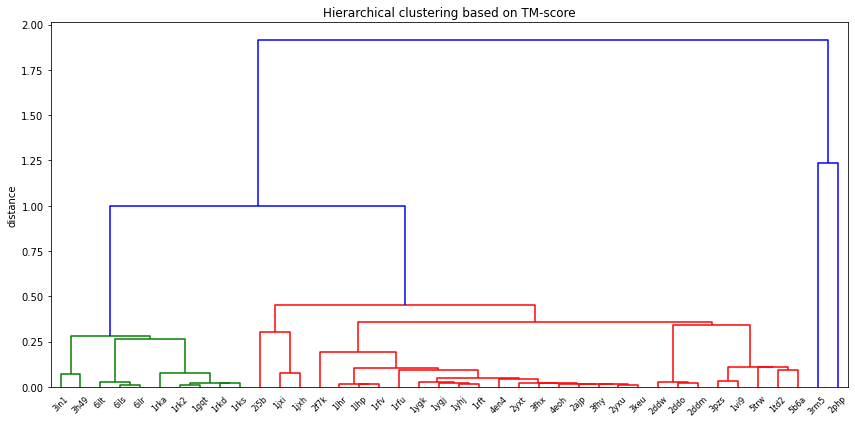

In [ ]:
fig = plt.figure(figsize=(12,6))

dendrogram(
            linkage(tm_score_up, method='single'),
            labels=new_covering_pdbs, leaf_rotation = 45, color_threshold=0.6
          )
plt.title("Hierarchical clustering based on TM-score")
plt.ylabel('distance')
plt.tight_layout()
plt.savefig(datapath2 + 'img/tmscore_observed.png')

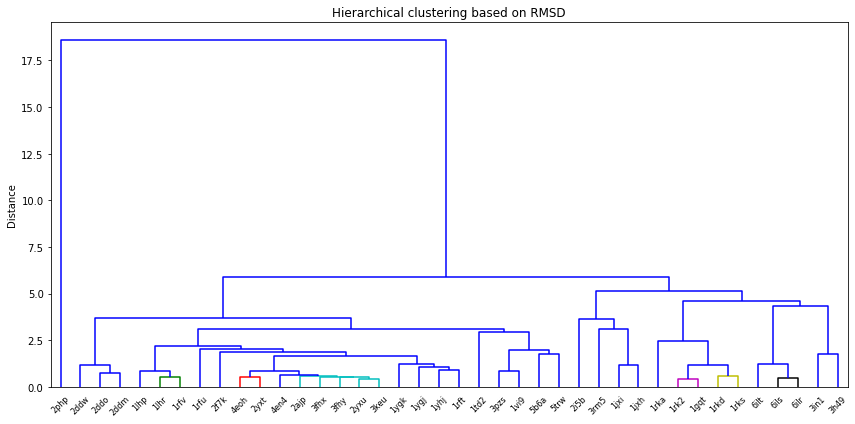

In [ ]:
fig = plt.figure(figsize=(12,6))

dendrogram(
            linkage(tm_rmsd_up, method='single'),
            labels=new_covering_pdbs, leaf_rotation = 45, color_threshold=0.6
        )
plt.title("Hierarchical clustering based on RMSD")
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig(datapath2 + 'img/rmsd_observed.png')

### Ex 4: remove outliers

I removed two pdb that apparently had a more different structure with the others (2php and 3rm5). The statistics obtained in this way have the suffix '_mod'. In this way, the final plot are more satisfactory.

In [ ]:
tm_score=pd.read_csv(datapath2 + 'coveringPDBSobserved/tmscore_observed_mod.csv')

In [ ]:
tm_score=tm_score.fillna(0)#substitute Nan with 0 otherwise upp2sym not work 
tm_score

def upp2sym(a):
    return np.where(a,a,a.T)

tm_score_up=tm_score.to_numpy()[:,1:]#first row is the index, so remove it
temp=upp2sym(tm_score_up)#get the full symmetric matrix
new_covering_pdbs=['1yhj', '4eoh', '1lhp', '3in1', '1rfu', '4en4', '6ils', '2ddo', '2ddm', '1rft', '1td2', '2i5b', '2yxu', '1rkd', '3fhx', '5b6a', '1rk2', '1ygj', '3keu', '6ilr', '1rka', '3pzs', '2yxt', '1vi9', '1lhr', '1jxi', '1ygk', '2ajp', '3h49', '3fhy', '1rfv', '1jxh', '2f7k', '1gqt', '2ddw', '1rks', '5trw', '6ilt']
df_tm_score=pd.DataFrame(temp,columns=new_covering_pdbs,index=new_covering_pdbs)

In [ ]:
tm_rmsd=pd.read_csv(datapath2 + 'coveringPDBSobserved/rmsd_observed_mod.csv')

In [ ]:
tm_rmsd=tm_rmsd.fillna(0)#substitute Nan with 0 otherwise upp2sym not work 

def upp2sym(a):
    return np.where(a,a,a.T)

tm_rmsd_up=tm_rmsd.to_numpy()[:,1:]#first row is the index, so remove it
temp=upp2sym(tm_rmsd_up)#get the full symmetric matrix

df_tm_rmsd=pd.DataFrame(temp,columns=new_covering_pdbs,index=new_covering_pdbs)

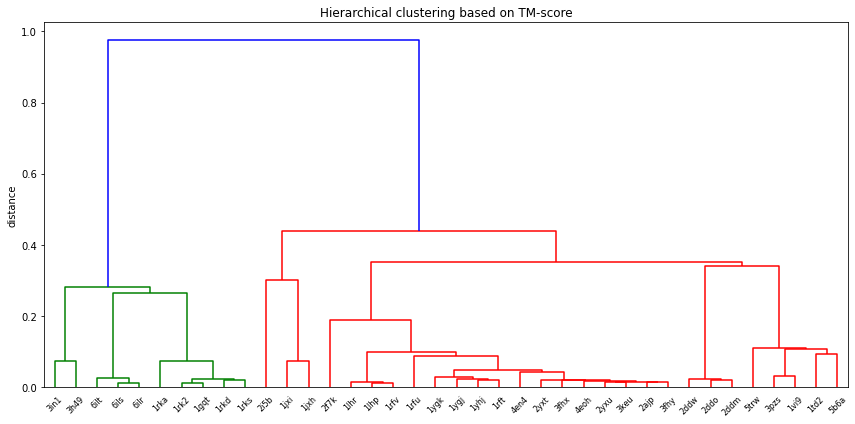

In [ ]:
fig = plt.figure(figsize=(12,6))

dendrogram(
            linkage(tm_score_up, method='single'),
            labels=new_covering_pdbs, leaf_rotation = 45, color_threshold=0.6
          )
plt.title("Hierarchical clustering based on TM-score")
plt.ylabel('distance')
plt.tight_layout()
plt.savefig(datapath2 + 'img/tmscore_observed_mod.png')

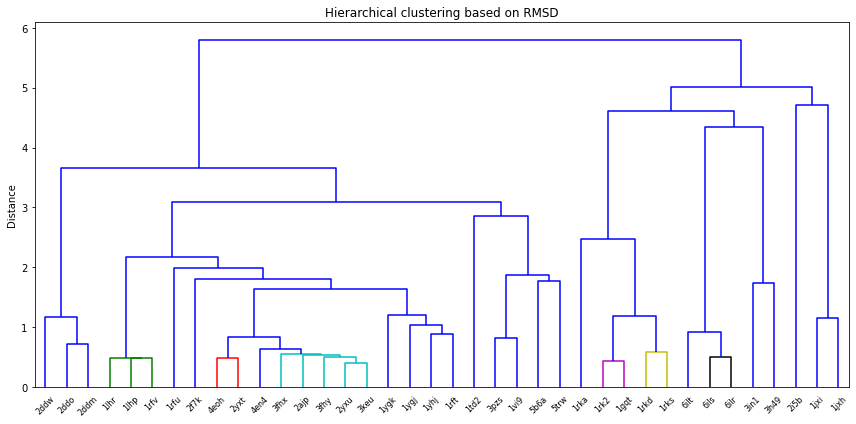

In [ ]:
fig = plt.figure(figsize=(12,6))

dendrogram(
            linkage(tm_rmsd_up, method='single'),
            labels=new_covering_pdbs, leaf_rotation = 45, color_threshold=0.6
          )
plt.title("Hierarchical clustering based on RMSD")
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig(datapath2 + 'img/rmsd_observed_mod.png')

### Ex 5: Multiple Structural Alignment

We used mTM-align on the web. Since it accepts max 30 pdbs, in the case of the larger dataset, we selected only a cluster of 25 pdbs. Results (including the fasta file) are in the folder PROJECT/structure/multiple structure alignment.


### Ex 6: Long range conserved contacts

In [ ]:
# create the list of 25 pdbs from the folder 'msa25' in 'multiple structure alignment'
from os import listdir
pdbs_tmp=listdir(datapath2 + "multiple structure alignment/msa25")
pdbs=[]
for pdb in pdbs_tmp:
  pdbs.append(pdb.split('.')[0])
print(pdbs)

['1lhp', '4eoh', '1yhj', '4en4', '1rfu', '1td2', '2ddm', '1rft', '2ddo', '3fhx', '2yxu', '5b6a', '1ygj', '3keu', '3pzs', '2yxt', '1vi9', '1lhr', '1ygk', '2ajp', '1rfv', '3fhy', '2f7k', '2ddw', '5trw']


Create a dict with:
- *key*: pdb
- *values*: list of 2d tuples (IDs, IDs) of residues near in the structure (<3.5 A) and far in the sequence (>12). 

In [ ]:
from Bio.PDB import PDBList, NeighborSearch
from Bio.PDB.PDBParser import PDBParser

dict_contacts={}
for pdb_id in pdbs:
  # Load the structure
  structure = PDBParser(QUIET=True).get_structure(pdb_id, datapath2 + "multiple structure alignment/msa25/{}.pdb".format(pdb_id))
  selected_residues = structure[0]['A']  # select chain A of first model (0)
  ns = NeighborSearch([atom for residue in selected_residues for atom in residue.get_atoms()])
  contacts_map=[]
  for residue1, residue2 in ns.search_all(3.5,#returns atoms below 3.5 A°
                                          level="R"):  # level="R" returns pairs of residues in contact considering all atoms
      if residue1.id[0] == " " and residue2.id[0] == " ":  # Exclude hetero/water residues
          if abs(residue1.id[1] - residue2.id[1]) > 12:  # Sequence separation > 12: the residuals have to be far more than 12
                                                        #this allows to pick only long-range contact residual (so avoid residuals in alpha helix)
              #print(residue1.id, residue2.id)
              contacts_map.append( (residue1.id[1], residue2.id[1]) )
  dict_contacts[pdb_id]=contacts_map


In [ ]:
# example
print(dict_contacts['1lhr'])

[(200, 220), (112, 148), (7, 36), (181, 206), (112, 147), (47, 120), (8, 36), (5, 34), (75, 101), (13, 39), (194, 222), (13, 41), (47, 125), (19, 235), (229, 289), (70, 100), (217, 250), (108, 145), (184, 202), (197, 225), (84, 121), (109, 145), (176, 204), (257, 309), (28, 239), (147, 184), (78, 109), (21, 38), (79, 246), (233, 263), (41, 122), (86, 129), (270, 289), (11, 38), (6, 36), (16, 287), (102, 143), (8, 80), (261, 304), (176, 206), (46, 231), (192, 222), (17, 290), (80, 109), (12, 40), (141, 180), (203, 219), (244, 259), (199, 225), (7, 35), (149, 185), (144, 180), (6, 34), (11, 39), (165, 220), (181, 205), (200, 221), (82, 110), (16, 44), (36, 77), (41, 55), (5, 78), (113, 148), (257, 307), (10, 38), (198, 223), (16, 49), (46, 121), (204, 217), (185, 201), (15, 43), (43, 122), (173, 206), (219, 310), (151, 188), (169, 218), (116, 153), (84, 125), (18, 231), (201, 220), (88, 131), (86, 123), (9, 37), (78, 108), (80, 111), (83, 113), (173, 218), (148, 184), (261, 306), (31, 24

The dictionary dict_contacts contains the positions of the contacts in the actual sequence. Now we need to find their positions in the msa, which presents some gaps.

In [ ]:
# Create a dictionary having as key the pdb_id and as value its aligned sequence
all_sequences = SeqIO.parse(datapath2 + 'multiple structure alignment/results_msa25.fasta', 'fasta')
msa25 = {}
for seq in all_sequences:
    pdb_id = seq.id.split('.')[0]
    aligned_seq = str(seq.seq)
    msa25[pdb_id] = aligned_seq
msa25

{'1lhp': '-------------------------ECRVLSIQSHVVRGYVGNRAATFPLQVLGFEVDAVNSVQFSNHTGYSHWKGQVLNSDELQELYDGLKLNHVNQ-YDYVLTGYTRDKSFLAMVVDIVQELKQQNPRLVYVCDPVMG-----------DQRNGEGAMY-----VPD-DLLPVYREKVVPVADIITPNQFEAELLTGRKIHSQEEALEVMDMLHS-MGPDTVVITSS-N-L-L-SPRGSDYLMALGSQRTRG-----SVVTQRIRMEMHKVDA---VFVGTGDLFAAMLLAWTH-KHPNNLKVACEKTVSAMHHVLQRTIKCAKAKSGEGVKPSPAQLELRMVQSKKDIESPEIVVQATVL-',
 '1lhr': '-------------------------ECRVLSIQSHVVRGYVGNRAATFPLQVLGFEVDAVNSVQFSNHTGYSHWKGQVLNSDELQELYDGLKLNHVNQ-YDYVLTGYTRDKSFLAMVVDIVQELKQQNPRLVYVCDPVMG-----------DQRNGEGAMY-----VPD-DLLPVYREKVVPVADIITPNQFEAELLTGRKIHSQEEALEVMDMLHS-MGPDTVVITSS-N-L-L-SPRGSDYLMALGSQRTRA------VVTQRIRMEMHKVDA---VFVGTGDLFAAMLLAWTH-KHPNNLKVACEKTVSAMHHVLQRTIKCAKAKSGEGVKPSPAQLELRMVQSKKDIESPEIVVQATVL-',
 '1rft': '-------------------------ECRVLSIQSHVVRGYVGNRAATFPLQVLGFEVDAVNSVQFSNHTGYSHWKGQVLNSDELQELYDGLKLNHVNQ-YDYVLTGYTRDKSFLAMVVDIVQELKQQNPRLVYVCDPVMGDQ-RNGEG--AM--------Y-----VPD-DLLPVYREKVVPVADIITPNQFEAELLTGRKIHSQEEALEVMDMLHS-MGPDTVVITSS-N-L-L-

In [ ]:
# Create a dictionary having as key the pdb_id and as value another dictionary 
# with the map from the original sequence to the aligned one.
conversions = {}
for pdb_id, aligned_seq in msa25.items():
    conversion = {}
    i = 1 #'i' represents the index of a certain residue in the original sequence
    for index, letter in enumerate(aligned_seq):
        if letter != '-':
            conversion[i] = index+1 #'index' represents the index of a certain residue in the msa (+1 is just to have 1 base convention)
            i += 1
    conversions[pdb_id] = conversion
print(conversions)

{'1lhp': {1: 26, 2: 27, 3: 28, 4: 29, 5: 30, 6: 31, 7: 32, 8: 33, 9: 34, 10: 35, 11: 36, 12: 37, 13: 38, 14: 39, 15: 40, 16: 41, 17: 42, 18: 43, 19: 44, 20: 45, 21: 46, 22: 47, 23: 48, 24: 49, 25: 50, 26: 51, 27: 52, 28: 53, 29: 54, 30: 55, 31: 56, 32: 57, 33: 58, 34: 59, 35: 60, 36: 61, 37: 62, 38: 63, 39: 64, 40: 65, 41: 66, 42: 67, 43: 68, 44: 69, 45: 70, 46: 71, 47: 72, 48: 73, 49: 74, 50: 75, 51: 76, 52: 77, 53: 78, 54: 79, 55: 80, 56: 81, 57: 82, 58: 83, 59: 84, 60: 85, 61: 86, 62: 87, 63: 88, 64: 89, 65: 90, 66: 91, 67: 92, 68: 93, 69: 94, 70: 95, 71: 96, 72: 97, 73: 98, 74: 100, 75: 101, 76: 102, 77: 103, 78: 104, 79: 105, 80: 106, 81: 107, 82: 108, 83: 109, 84: 110, 85: 111, 86: 112, 87: 113, 88: 114, 89: 115, 90: 116, 91: 117, 92: 118, 93: 119, 94: 120, 95: 121, 96: 122, 97: 123, 98: 124, 99: 125, 100: 126, 101: 127, 102: 128, 103: 129, 104: 130, 105: 131, 106: 132, 107: 133, 108: 134, 109: 135, 110: 136, 111: 137, 112: 138, 113: 139, 114: 140, 115: 152, 116: 153, 117: 154, 1

Example

In [ ]:
aligned_seq = msa25['2ddm']
aligned_seq

'KSRALQA--------------------DIVAVQSQVVYGSVGNSIAVPAIKQNGLNVFAVPTVLLSNTPHYDTFYGGAIPDEWFSGYLRALQERDALRQLRAVTTGYMGTASQIKILAEWLTALRKDHPDLLIMVDPVIGDID------SGI--------Y-----VKP-DLPEAYRQYLLPLAQGITPNIFELEILTGKNCRDLDSAIAAAKSLLSD-TLKWVVV-TS------------QEMQVVVVTA-----------DSVNVISHSRVKT---DLKGTGDLFCAQLISGLLKGK--ALTDAVHRAGLRVLEVMRYTQQHE-------------SDELIL--PPL---------------'

In [ ]:
original_seq = aligned_seq.replace('-','')
original_seq

'KSRALQADIVAVQSQVVYGSVGNSIAVPAIKQNGLNVFAVPTVLLSNTPHYDTFYGGAIPDEWFSGYLRALQERDALRQLRAVTTGYMGTASQIKILAEWLTALRKDHPDLLIMVDPVIGDIDSGIYVKPDLPEAYRQYLLPLAQGITPNIFELEILTGKNCRDLDSAIAAAKSLLSDTLKWVVVTSQEMQVVVVTADSVNVISHSRVKTDLKGTGDLFCAQLISGLLKGKALTDAVHRAGLRVLEVMRYTQQHESDELILPPL'

In [ ]:
# After the seventh residue there are some gaps up to the 28th position
print(conversions['2ddm'])

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 28, 9: 29, 10: 30, 11: 31, 12: 32, 13: 33, 14: 34, 15: 35, 16: 36, 17: 37, 18: 38, 19: 39, 20: 40, 21: 41, 22: 42, 23: 43, 24: 44, 25: 45, 26: 46, 27: 47, 28: 48, 29: 49, 30: 50, 31: 51, 32: 52, 33: 53, 34: 54, 35: 55, 36: 56, 37: 57, 38: 58, 39: 59, 40: 60, 41: 61, 42: 62, 43: 63, 44: 64, 45: 65, 46: 66, 47: 67, 48: 68, 49: 69, 50: 70, 51: 71, 52: 72, 53: 73, 54: 74, 55: 75, 56: 76, 57: 77, 58: 78, 59: 79, 60: 80, 61: 81, 62: 82, 63: 83, 64: 84, 65: 85, 66: 86, 67: 87, 68: 88, 69: 89, 70: 90, 71: 91, 72: 92, 73: 93, 74: 94, 75: 95, 76: 96, 77: 97, 78: 98, 79: 99, 80: 100, 81: 101, 82: 102, 83: 103, 84: 104, 85: 105, 86: 106, 87: 107, 88: 108, 89: 109, 90: 110, 91: 111, 92: 112, 93: 113, 94: 114, 95: 115, 96: 116, 97: 117, 98: 118, 99: 119, 100: 120, 101: 121, 102: 122, 103: 123, 104: 124, 105: 125, 106: 126, 107: 127, 108: 128, 109: 129, 110: 130, 111: 131, 112: 132, 113: 133, 114: 134, 115: 135, 116: 136, 117: 137, 118: 138, 119: 139, 120

Now, as written in the assignment, we can align the contact maps of each structure based on the multiple structural alignment and identify conserved positions.

In [ ]:
conserved_contacts = {}
for pdb_id in pdbs:
    contacts = set() # a residue may be in contact with more than 1
    for pair in dict_contacts[pdb_id]:
        for pos in pair:# ie. pair=(47, 121)
            contacts.add(pos)# contact={47, 121, ...}
    for pos in contacts:
        new_pos = conversions[pdb_id].get(pos, 'other')#convert the position in original seq to position in msa
        conserved_contacts[new_pos] = conserved_contacts.get(new_pos, 0) + 1 # key=pos. in msa; value=n°of conserved residue in that position
del conserved_contacts['other']

In [ ]:
print(conserved_contacts)# key=pos. in msa; value=n°of conserved residue in that position

{30: 20, 31: 23, 32: 21, 33: 23, 34: 25, 35: 25, 36: 24, 37: 25, 38: 25, 39: 25, 40: 24, 41: 21, 42: 21, 43: 23, 44: 15, 45: 19, 46: 12, 51: 10, 53: 10, 56: 13, 59: 16, 61: 19, 63: 20, 64: 22, 65: 24, 66: 25, 67: 22, 68: 25, 69: 18, 71: 16, 72: 8, 74: 13, 77: 9, 80: 12, 82: 9, 84: 8, 88: 8, 91: 9, 95: 7, 101: 19, 103: 23, 104: 24, 105: 25, 106: 24, 107: 23, 108: 17, 109: 20, 110: 18, 111: 16, 112: 13, 114: 20, 115: 17, 116: 16, 119: 11, 126: 13, 127: 21, 128: 15, 130: 16, 131: 15, 134: 19, 135: 20, 136: 21, 137: 25, 138: 20, 139: 19, 140: 19, 152: 8, 153: 3, 156: 2, 157: 3, 158: 3, 159: 3, 160: 3, 161: 10, 167: 10, 172: 6, 174: 14, 175: 13, 184: 18, 185: 21, 186: 23, 187: 19, 188: 23, 189: 21, 190: 19, 191: 22, 192: 21, 193: 23, 194: 23, 196: 21, 208: 10, 211: 11, 215: 13, 216: 15, 220: 12, 222: 17, 224: 20, 225: 20, 226: 22, 227: 22, 228: 21, 229: 22, 231: 21, 233: 22, 235: 16, 237: 17, 238: 11, 240: 12, 241: 13, 242: 11, 244: 17, 245: 18, 246: 21, 247: 22, 248: 21, 249: 24, 250: 22, 

In [ ]:
print( sorted(conserved_contacts.keys()) ) 

[8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 156, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 2

In [ ]:
conserved_contacts_sorted = [conserved_contacts[k] for k in sorted(conserved_contacts.keys()) if k != 'other']
print(conserved_contacts_sorted)#n° conserved residue for position in msa

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 5, 11, 17, 20, 23, 21, 23, 25, 25, 24, 25, 25, 25, 24, 21, 21, 23, 15, 19, 12, 8, 12, 7, 7, 10, 10, 10, 10, 15, 13, 7, 14, 16, 16, 19, 19, 20, 22, 24, 25, 22, 25, 18, 15, 16, 8, 12, 13, 4, 3, 9, 1, 12, 12, 12, 9, 6, 8, 5, 6, 5, 8, 5, 9, 9, 4, 7, 4, 7, 4, 5, 2, 3, 12, 19, 17, 23, 24, 25, 24, 23, 17, 20, 18, 16, 13, 13, 20, 17, 16, 7, 5, 11, 7, 5, 7, 5, 8, 12, 13, 21, 15, 13, 16, 15, 9, 10, 19, 20, 21, 25, 20, 19, 19, 17, 17, 13, 12, 10, 4, 4, 5, 4, 8, 8, 3, 2, 3, 3, 3, 3, 10, 1, 1, 1, 10, 8, 8, 12, 6, 7, 14, 13, 4, 5, 3, 10, 17, 9, 8, 5, 18, 21, 23, 19, 23, 21, 19, 22, 21, 23, 23, 20, 21, 16, 13, 11, 15, 13, 10, 6, 4, 9, 4, 11, 10, 8, 6, 11, 6, 9, 11, 13, 15, 10, 12, 12, 11, 17, 16, 20, 20, 22, 22, 21, 22, 1, 21, 3, 22, 2, 16, 2, 17, 11, 8, 12, 13, 11, 12, 17, 18, 21, 22, 21, 24, 22, 21, 16, 12, 12, 1, 4, 2, 4, 7, 3, 3, 5, 7, 8, 11, 10, 13, 14, 20, 23, 22, 21, 22, 2, 1, 3, 18, 18, 20, 15, 12, 9, 9, 7, 11, 15, 14, 11, 9, 14, 14, 10, 13, 12, 5, 12, 

In [ ]:
positions_sorted = sorted(conserved_contacts.keys())
print(positions_sorted)#positions in which there are conserved contacts

[8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 156, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 2

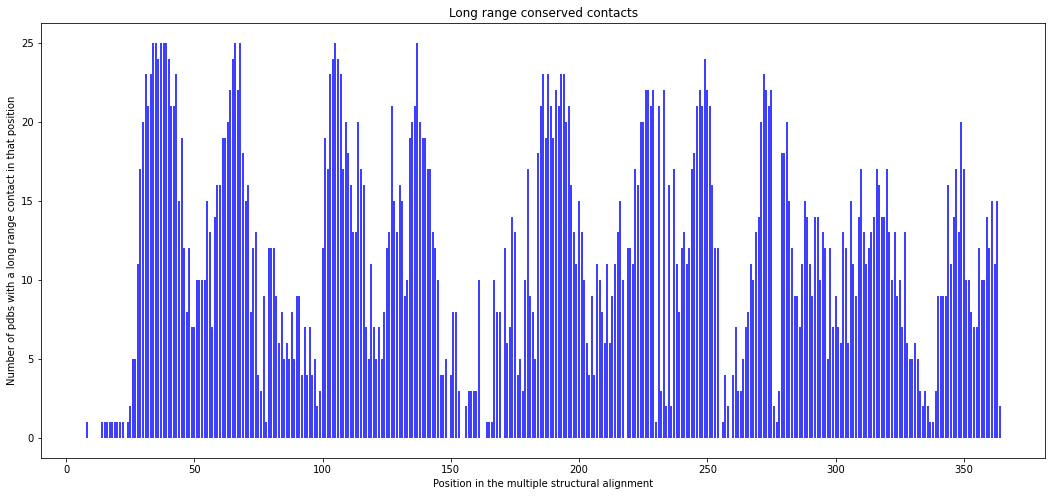

In [ ]:
# Plot
plt.figure(figsize=(18,8))
plt.vlines(positions_sorted, 0, conserved_contacts_sorted, colors='blue')
plt.title('Long range conserved contacts')
plt.xlabel('Position in the multiple structural alignment')
plt.ylabel('Number of pdbs with a long range contact in that position')
plt.savefig(datapath2 + 'img/conserved_contacts.png')
plt.show()

In [ ]:
# Compute the most conserved contact positions - 100%
consensus_threshold = 1

most_conserved_contacts = []
for i, consensus in enumerate(conserved_contacts_sorted):
    if consensus >= 25*consensus_threshold: # consensus = 25 (=> residue is conserved for all the pdbs)
        most_conserved_contacts.append(positions_sorted[i])
print(most_conserved_contacts)

[34, 35, 37, 38, 39, 66, 68, 105, 137]


In [ ]:
# Compute the most conserved contact positions - 90%
consensus_threshold = 0.9

most_conserved_contacts = []
for i, consensus in enumerate(conserved_contacts_sorted):
    if consensus >= 25*consensus_threshold:
        most_conserved_contacts.append(positions_sorted[i])
print(most_conserved_contacts)

[31, 33, 34, 35, 36, 37, 38, 39, 40, 43, 65, 66, 68, 103, 104, 105, 106, 107, 137, 186, 188, 193, 194, 249, 272]


In [ ]:
# Compute the most conserved contact positions - 80%
consensus_threshold = 0.8

most_conserved_contacts = []
for i, consensus in enumerate(conserved_contacts_sorted):
    if consensus >= 25*consensus_threshold:
        most_conserved_contacts.append(positions_sorted[i])
print(most_conserved_contacts)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 63, 64, 65, 66, 67, 68, 103, 104, 105, 106, 107, 109, 114, 127, 135, 136, 137, 138, 185, 186, 188, 189, 191, 192, 193, 194, 195, 196, 224, 225, 226, 227, 228, 229, 231, 233, 246, 247, 248, 249, 250, 251, 271, 272, 273, 274, 275, 281, 349]


### Ex 7: CATH

In [ ]:
#Create the original sequence 
original_seq_25={}
for pdb_id, aligned_seq in msa25.items():
    original_seq_25[pdb_id]=aligned_seq.replace('-','')   
original_seq_25

{'1lhp': 'ECRVLSIQSHVVRGYVGNRAATFPLQVLGFEVDAVNSVQFSNHTGYSHWKGQVLNSDELQELYDGLKLNHVNQYDYVLTGYTRDKSFLAMVVDIVQELKQQNPRLVYVCDPVMGDQRNGEGAMYVPDDLLPVYREKVVPVADIITPNQFEAELLTGRKIHSQEEALEVMDMLHSMGPDTVVITSSNLLSPRGSDYLMALGSQRTRGSVVTQRIRMEMHKVDAVFVGTGDLFAAMLLAWTHKHPNNLKVACEKTVSAMHHVLQRTIKCAKAKSGEGVKPSPAQLELRMVQSKKDIESPEIVVQATVL',
 '1lhr': 'ECRVLSIQSHVVRGYVGNRAATFPLQVLGFEVDAVNSVQFSNHTGYSHWKGQVLNSDELQELYDGLKLNHVNQYDYVLTGYTRDKSFLAMVVDIVQELKQQNPRLVYVCDPVMGDQRNGEGAMYVPDDLLPVYREKVVPVADIITPNQFEAELLTGRKIHSQEEALEVMDMLHSMGPDTVVITSSNLLSPRGSDYLMALGSQRTRAVVTQRIRMEMHKVDAVFVGTGDLFAAMLLAWTHKHPNNLKVACEKTVSAMHHVLQRTIKCAKAKSGEGVKPSPAQLELRMVQSKKDIESPEIVVQATVL',
 '1rft': 'ECRVLSIQSHVVRGYVGNRAATFPLQVLGFEVDAVNSVQFSNHTGYSHWKGQVLNSDELQELYDGLKLNHVNQYDYVLTGYTRDKSFLAMVVDIVQELKQQNPRLVYVCDPVMGDQRNGEGAMYVPDDLLPVYREKVVPVADIITPNQFEAELLTGRKIHSQEEALEVMDMLHSMGPDTVVITSSNLLSPRGSDYLMALGSQRTRAPDGSVVTQRIRMEMHKVDAVFVGTGDLFAAMLLAWTHKHPNNLKVACEKTVSAMHHVLQRTIKCAKAKSGEGVKPSPAQLELRMVQSKKDIESPEIVVQATVL',
 '1rfu': 'MEEECRVLSIQSHVVRGYVGNRAATFPLQVL

In [ ]:
#create a fasta file with the original sequences (it is needed for the hmmscan search) 
with open(datapath2 + 'multiple structure alignment/original_seq_25.fasta','w') as f:
  for pdb_id, seq in original_seq_25.items():
    f.write(">" + pdb_id + "\n" + seq + "\n")


The output of hmmscan search:
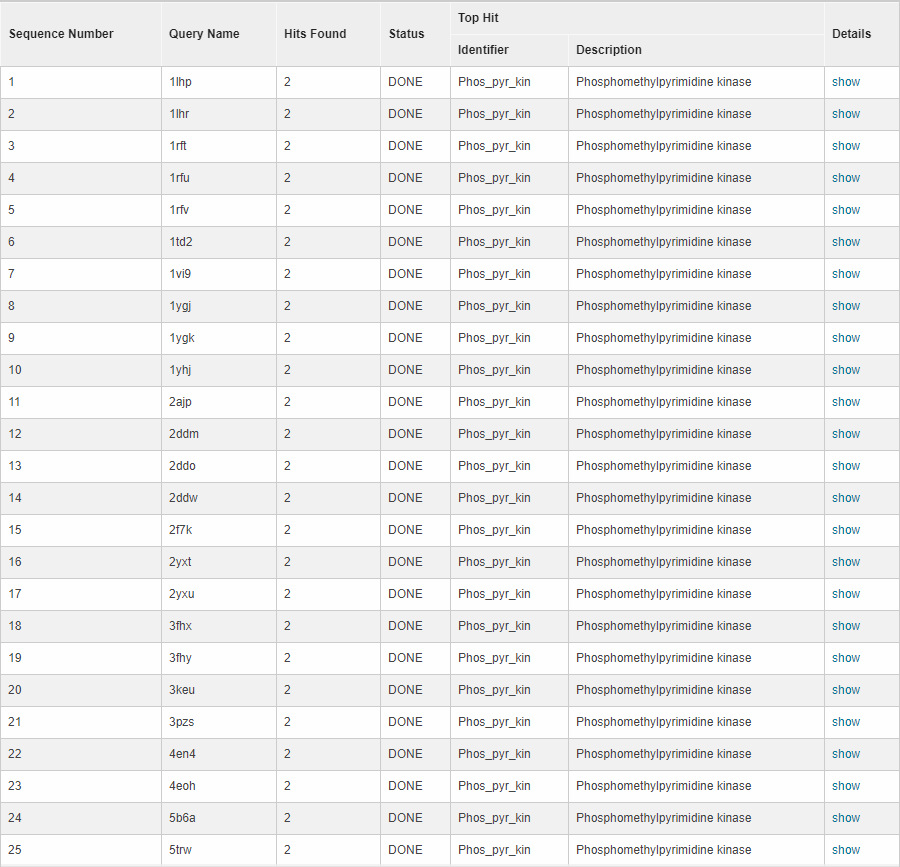


Checkeing all PDBS is possible to discover that they belong to:

- Clan: CL0118
- Family: Phos_pyr_kin (Phosphomethylpyrimidine kinase)

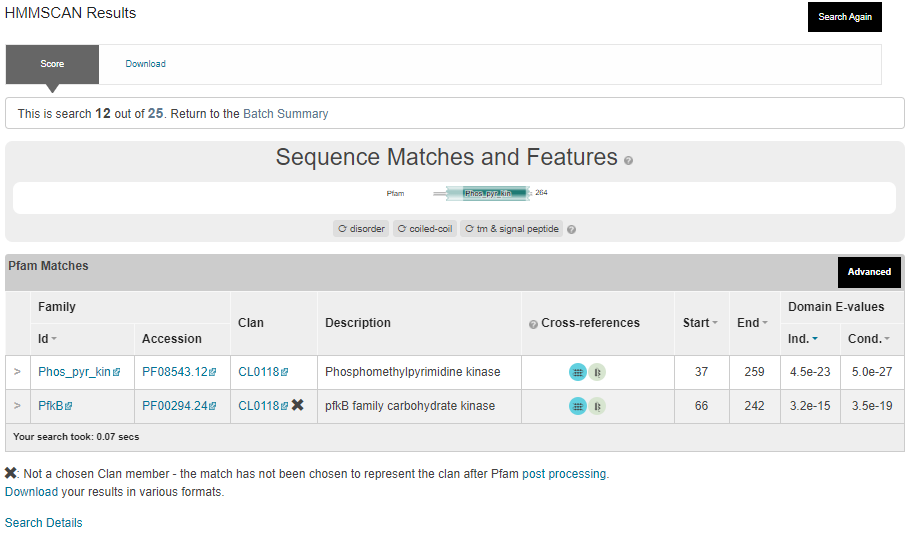

# Taxonomy

### Ex 8: taxonomic lineage

In [ ]:
# Recover the list of sequence id (168)
with open(datapath2+'dataset_bestmodel.txt') as f:
    dataset_bestmodel = f.read().splitlines()
print(dataset_bestmodel)

['Q8FTH8', 'Q5M731', 'P99124', 'P66915', 'Q8NVH3', 'Q6G7L7', 'Q6GEY2', 'P61422', 'P76422', 'P56904', 'O48881', 'P55882', 'O67772', 'O31620', 'P44697', 'Q9ZBL1', 'O94266', 'Q2QWK9', 'Q8NQH1', 'O25515', 'Q9ZL00', 'Q9ZBR6', 'Q08975', 'Q06490', 'Q08224', 'P39610', 'P9WG77', 'P9WG76', 'P66914', 'Q5HI96', 'Q5HRG7', 'Q8CTQ7', 'O85786', 'Q9USL6', 'O94265', 'Q9WZP7', 'Q57688', 'O83153', 'P40191', 'B1IX53', 'A8A2R4', 'B1XA89', 'C4ZVU9', 'B7LL66', 'Q83K78', 'B7NPV5', 'Q3YZC3', 'B6I4Z5', 'B7M6S8', 'B7UGB9', 'A7ZPL9', 'B2TX08', 'Q1R8V2', 'Q8FFB5', 'Q0TF48', 'A1ADT5', 'B7MY71', 'B7MHS2', 'B7N609', 'Q32DD5', 'B7LCG3', 'B5YZW5', 'Q8XBL0', 'B1LML3', 'O01824', 'Q0BSF0', 'P44690', 'A5UA83', 'Q1LFU5', 'Q1CIM6', 'Q7CIR8', 'Q1C792', 'Q66A50', 'Q1J237', 'Q7MGA4', 'Q8D4Q2', 'Q87FP6', 'Q5PNC8', 'A7N5Q6', 'Q9CNY1', 'P40192', 'Q57LS3', 'Q8Z4W1', 'Q9RYX0', 'Q2L1P5', 'Q6LP62', 'A6VNE5', 'B3H2H2', 'B0UUD2', 'Q0I3D2', 'Q7N3W7', 'A3N2D3', 'Q51892', 'Q8ZPM8', 'Q57PI7', 'Q65UE8', 'Q5PIK8', 'Q6AFC1', 'Q02DJ3', 'Q1I2L8',

Query on Uniprot to get the lineage for each protein in ```
family_sequences
```:

In [ ]:
# Per fare una query su uniprot
for id in dataset_bestmodel:
    print(id.lower(), end=' OR ')

q8fth8 OR q5m731 OR p99124 OR p66915 OR q8nvh3 OR q6g7l7 OR q6gey2 OR p61422 OR p76422 OR p56904 OR o48881 OR p55882 OR o67772 OR o31620 OR p44697 OR q9zbl1 OR o94266 OR q2qwk9 OR q8nqh1 OR o25515 OR q9zl00 OR q9zbr6 OR q08975 OR q06490 OR q08224 OR p39610 OR p9wg77 OR p9wg76 OR p66914 OR q5hi96 OR q5hrg7 OR q8ctq7 OR o85786 OR q9usl6 OR o94265 OR q9wzp7 OR q57688 OR o83153 OR p40191 OR b1ix53 OR a8a2r4 OR b1xa89 OR c4zvu9 OR b7ll66 OR q83k78 OR b7npv5 OR q3yzc3 OR b6i4z5 OR b7m6s8 OR b7ugb9 OR a7zpl9 OR b2tx08 OR q1r8v2 OR q8ffb5 OR q0tf48 OR a1adt5 OR b7my71 OR b7mhs2 OR b7n609 OR q32dd5 OR b7lcg3 OR b5yzw5 OR q8xbl0 OR b1lml3 OR o01824 OR q0bsf0 OR p44690 OR a5ua83 OR q1lfu5 OR q1cim6 OR q7cir8 OR q1c792 OR q66a50 OR q1j237 OR q7mga4 OR q8d4q2 OR q87fp6 OR q5pnc8 OR a7n5q6 OR q9cny1 OR p40192 OR q57ls3 OR q8z4w1 OR q9ryx0 OR q2l1p5 OR q6lp62 OR a6vne5 OR b3h2h2 OR b0uud2 OR q0i3d2 OR q7n3w7 OR a3n2d3 OR q51892 OR q8zpm8 OR q57pi7 OR q65ue8 OR q5pik8 OR q6afc1 OR q02dj3 OR q1i2l8 OR 

Change the columns selecting lineage, taxonomic id, organism... And download tab file.

In [ ]:
# Read the file
df_taxonomy = pd.read_csv(datapath2 + 'uniprot-taxlineage-allseq.tab', sep='\t', header=0)
# df_taxonomy

In [ ]:
# Filter only our sequences
df_taxonomy_filtered = df_taxonomy.loc[df_taxonomy['Entry'].isin(dataset_bestmodel)]
df_taxonomy_filtered.index = list(range(1,169))
df_taxonomy_filtered

,Entry,Entry name,Protein names,Gene names,Organism ID,Organism,Taxonomic lineage IDs,Taxonomic lineage (ALL)
1,Q9ZL00,THID_HELPJ,Hydroxymethylpyrimidine/phosphomethylpyrimidin...,thiD jhp_0782,85963,Helicobacter pylori (strain J99 / ATCC 700824)...,85963,"cellular organisms, Bacteria, Proteobacteria, ..."
2,Q9ZBR6,THID_STRCO,Hydroxymethylpyrimidine/phosphomethylpyrimidin...,thiD SCO5563 SC7A1.07,100226,Streptomyces coelicolor (strain ATCC BAA-471 /...,100226,"cellular organisms, Bacteria, Terrabacteria gr..."
3,Q9ZBL1,THID_MYCLE,Hydroxymethylpyrimidine/phosphomethylpyrimidin...,thiD ML0295 MLCB1450.27c,272631,Mycobacterium leprae (strain TN),272631,"cellular organisms, Bacteria, Terrabacteria gr..."
4,Q9WZP7,THIDN_THEMA,Bifunctional thiamine biosynthesis protein Thi...,thiDN TM_0790,243274,Thermotoga maritima (strain ATCC 43589 / MSB8 ...,243274,"cellular organisms, Bacteria, Thermotogae, The..."
5,Q9USL6,YJK5_SCHPO,Putative hydroxymethylpyrimidine/phosphomethyl...,SPCC18B5.05c,284812,Schizosaccharomyces pombe (strain 972 / ATCC 2...,284812,"cellular organisms, Eukaryota, Opisthokonta, F..."
...,...,...,...,...,...,...,...,...
164,A3N2D3,PDXY_ACTP2,Pyridoxal kinase PdxY (PL kinase) (EC 2.7.1.35),pdxY APL_1485,416269,Actinobacillus pleuropneumoniae serotype 5b (s...,416269,"cellular organisms, Bacteria, Proteobacteria, ..."
165,A2BLC0,NNR_HYPBU,Bifunctional NAD(P)H-hydrate repair enzyme Nnr...,nnr Hbut_0933,415426,Hyperthermus butylicus (strain DSM 5456 / JCM ...,415426,"cellular organisms, Archaea, TACK group, Crena..."
166,A1AV12,HLDE_PELPD,Bifunctional protein HldE [Includes: D-beta-D-...,hldE Ppro_3591,338966,Pelobacter propionicus (strain DSM 2379 / NBRC...,338966,"cellular organisms, Bacteria, Proteobacteria, ..."
167,A1ADT5,PDXK_ECOK1,Pyridoxine/pyridoxal/pyridoxamine kinase (PN/P...,pdxK Ecok1_23310 APECO1_4127,405955,Escherichia coli O1:K1 / APEC,405955,"cellular organisms, Bacteria, Proteobacteria, ..."


In [ ]:
# Save
# df_taxonomy_filtered.to_csv(datapath2+'df_taxonomy_filtered.csv')

In [ ]:
# Load
df_taxonomy_filtered = pd.read_csv(datapath2 + 'df_taxonomy_filtered.csv', header=0, index_col=0)
df_taxonomy_filtered

,Entry,Entry name,Protein names,Gene names,Organism ID,Organism,Taxonomic lineage IDs,Taxonomic lineage (ALL)
1,Q9ZL00,THID_HELPJ,Hydroxymethylpyrimidine/phosphomethylpyrimidin...,thiD jhp_0782,85963,Helicobacter pylori (strain J99 / ATCC 700824)...,85963,"cellular organisms, Bacteria, Proteobacteria, ..."
2,Q9ZBR6,THID_STRCO,Hydroxymethylpyrimidine/phosphomethylpyrimidin...,thiD SCO5563 SC7A1.07,100226,Streptomyces coelicolor (strain ATCC BAA-471 /...,100226,"cellular organisms, Bacteria, Terrabacteria gr..."
3,Q9ZBL1,THID_MYCLE,Hydroxymethylpyrimidine/phosphomethylpyrimidin...,thiD ML0295 MLCB1450.27c,272631,Mycobacterium leprae (strain TN),272631,"cellular organisms, Bacteria, Terrabacteria gr..."
4,Q9WZP7,THIDN_THEMA,Bifunctional thiamine biosynthesis protein Thi...,thiDN TM_0790,243274,Thermotoga maritima (strain ATCC 43589 / MSB8 ...,243274,"cellular organisms, Bacteria, Thermotogae, The..."
5,Q9USL6,YJK5_SCHPO,Putative hydroxymethylpyrimidine/phosphomethyl...,SPCC18B5.05c,284812,Schizosaccharomyces pombe (strain 972 / ATCC 2...,284812,"cellular organisms, Eukaryota, Opisthokonta, F..."
...,...,...,...,...,...,...,...,...
164,A3N2D3,PDXY_ACTP2,Pyridoxal kinase PdxY (PL kinase) (EC 2.7.1.35),pdxY APL_1485,416269,Actinobacillus pleuropneumoniae serotype 5b (s...,416269,"cellular organisms, Bacteria, Proteobacteria, ..."
165,A2BLC0,NNR_HYPBU,Bifunctional NAD(P)H-hydrate repair enzyme Nnr...,nnr Hbut_0933,415426,Hyperthermus butylicus (strain DSM 5456 / JCM ...,415426,"cellular organisms, Archaea, TACK group, Crena..."
166,A1AV12,HLDE_PELPD,Bifunctional protein HldE [Includes: D-beta-D-...,hldE Ppro_3591,338966,Pelobacter propionicus (strain DSM 2379 / NBRC...,338966,"cellular organisms, Bacteria, Proteobacteria, ..."
167,A1ADT5,PDXK_ECOK1,Pyridoxine/pyridoxal/pyridoxamine kinase (PN/P...,pdxK Ecok1_23310 APECO1_4127,405955,Escherichia coli O1:K1 / APEC,405955,"cellular organisms, Bacteria, Proteobacteria, ..."


In [ ]:
df_taxonomy_filtered.iloc[:,[0,7]]

,Entry,Taxonomic lineage (ALL)
1,Q9ZL00,"cellular organisms, Bacteria, Proteobacteria, ..."
2,Q9ZBR6,"cellular organisms, Bacteria, Terrabacteria gr..."
3,Q9ZBL1,"cellular organisms, Bacteria, Terrabacteria gr..."
4,Q9WZP7,"cellular organisms, Bacteria, Thermotogae, The..."
5,Q9USL6,"cellular organisms, Eukaryota, Opisthokonta, F..."
...,...,...
164,A3N2D3,"cellular organisms, Bacteria, Proteobacteria, ..."
165,A2BLC0,"cellular organisms, Archaea, TACK group, Crena..."
166,A1AV12,"cellular organisms, Bacteria, Proteobacteria, ..."
167,A1ADT5,"cellular organisms, Bacteria, Proteobacteria, ..."


In [ ]:
df_temp=df_taxonomy_filtered.iloc[:,[6]]
df_temp
#Save
# df_temp.to_csv(datapath2+'df_temp.csv')

In [ ]:
entry_id = df_taxonomy_filtered.loc[:, 'Entry']

In [ ]:
lineage = df_taxonomy_filtered.loc[:, 'Taxonomic lineage (ALL)']

In [ ]:
entry_id[168]

'A1A6H3'

In [ ]:
lineage[168]

'cellular organisms, Eukaryota, Viridiplantae, Streptophyta, Streptophytina, Embryophyta, Tracheophyta, Euphyllophyta, Spermatophyta, Magnoliopsida, Mesangiospermae, eudicotyledons, Gunneridae, Pentapetalae, rosids, malvids, Brassicales, Brassicaceae, Camelineae, Arabidopsis, Arabidopsis thaliana (Mouse-ear cress)'

In [ ]:
# lineage_dict has as key the uniprot id, and as value a list representing the taxonomic lineage
lineage_dict = {}
for i in range(1, 169):
    k = entry_id[i]
    v = lineage[i].split(', ')#to transform a uique string in a list of strings
    lineage_dict[k] = v

In [ ]:
# check
len(lineage_dict)

168

In [ ]:
# Example
lineage_dict['A1A6H3']

['cellular organisms',
 'Eukaryota',
 'Viridiplantae',
 'Streptophyta',
 'Streptophytina',
 'Embryophyta',
 'Tracheophyta',
 'Euphyllophyta',
 'Spermatophyta',
 'Magnoliopsida',
 'Mesangiospermae',
 'eudicotyledons',
 'Gunneridae',
 'Pentapetalae',
 'rosids',
 'malvids',
 'Brassicales',
 'Brassicaceae',
 'Camelineae',
 'Arabidopsis',
 'Arabidopsis thaliana (Mouse-ear cress)']

### Ex 9: taxonomic tree

In [ ]:
#---------------------------------- Bio python

In [ ]:
!pip install biopython

In [ ]:
from Bio import Phylo

The 'phyliptree.phy' file has been generated from the web interface:

https://www.ncbi.nlm.nih.gov/Taxonomy/CommonTree/wwwcmt.cgi

providing as input all the TAX_IDs listed in tax_ids.txt.

In [ ]:
tree=Phylo.read(datapath2+'phyliptree.phy','newick')

In [ ]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=4.0, name='cellular organisms')
        Clade(branch_length=4.0, name='Archaea')
            Clade(branch_length=4.0, name='Hyperthermus butylicus DSM 5456')
            Clade(branch_length=4.0, name='Methanocaldococcus jannaschii DSM 2661')
        Clade(branch_length=4.0, name='Eukaryota')
            Clade(branch_length=4.0, name='Dictyostelium discoideum')
            Clade(branch_length=4.0, name='Opisthokonta')
                Clade(branch_length=4.0, name='Ascomycota')
                    Clade(branch_length=4.0, name='Saccharomyces cerevisiae S288C')
                    Clade(branch_length=4.0, name='Schizosaccharomyces pombe 972h-')
                Clade(branch_length=4.0, name='Bilateria')
                    Clade(branch_length=4.0, name='Boreoeutheria')
                        Clade(branch_length=4.0, name='Artiodactyla')
                            Clade(branch_length=4.0, name='Bovidae')
                              

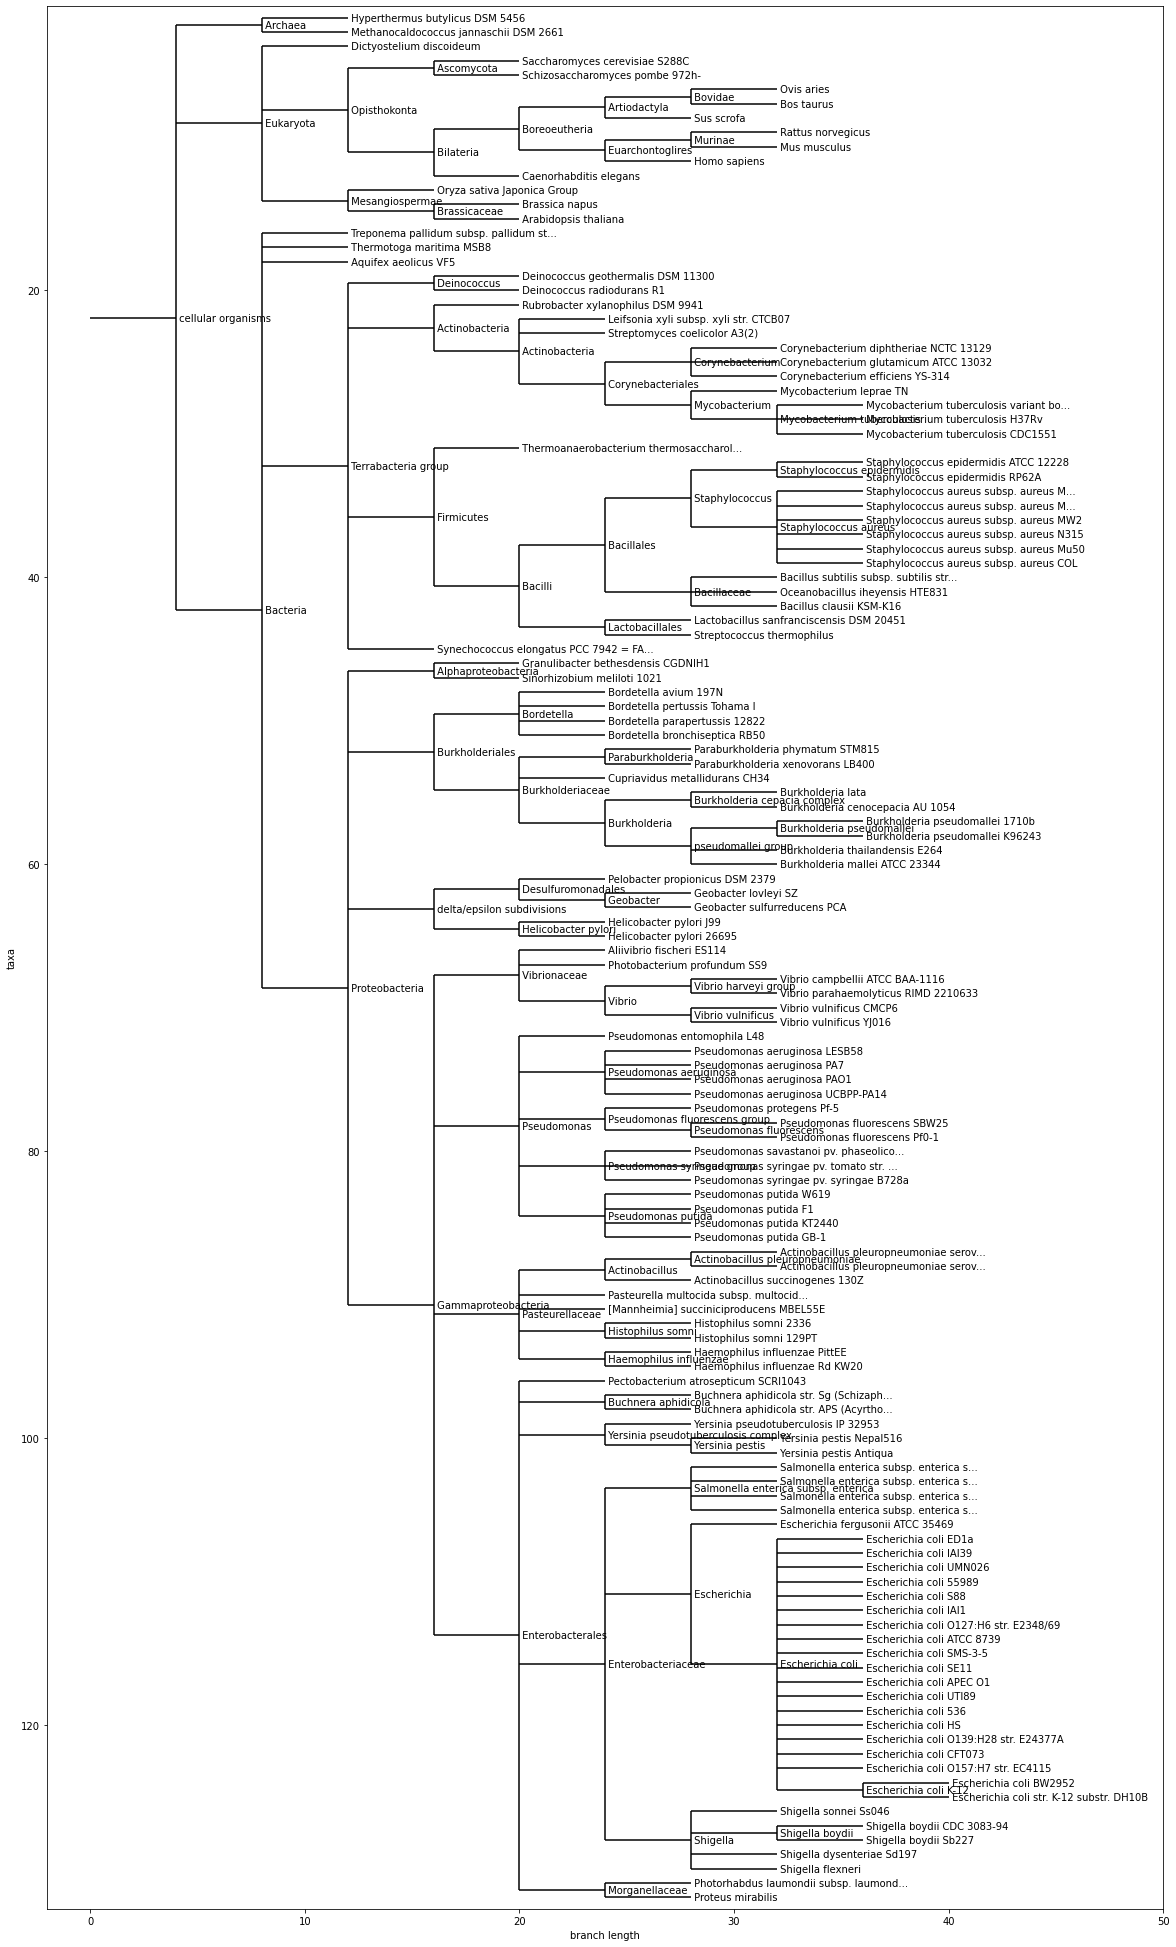

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(20, 35))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)


In [ ]:
#--------------------------ETE (works only on local!!!)

It can be used to show the tree, but also to generate the newick file format useful for other 

In [ ]:
!pip install ete3  PyQt5
from ete3 import Tree

     |████████████████████████████████| 4.7MB 8.5MB/s 
     |████████████████████████████████| 68.3MB 50kB/s 
     |████████████████████████████████| 286kB 36.2MB/s 
  Created wheel for ete3: filename=ete3-3.1.2-cp36-none-any.whl size=2272998 sha256=703429e9a04b314f7020d53093db9208306d87d9dcbbcd382c771156e177e0eb
  Stored in directory: /root/.cache/pip/wheels/22/37/14/723e53cc6295e9d3b83de0289a4666324ddebe8cbcb024a722
Successfully built ete3


In [ ]:
# Load a tree structure from a newick file.
t=Tree(datapath2+'phyliptree.phy',format=1,quoted_node_names=True)

Create the dictionary of frequencies:

- (*key*= node , *value*=n° times it is traversed in lineages)

In [ ]:
freq_dict={}
for k,v in lineage_dict.items():
  for elem in v:
    freq_dict[elem]=freq_dict.setdefault(elem,0)+1

In [ ]:
freq_dict['Hyperthermus butylicus (strain DSM 5456 / JCM 9403 / PLM1-5)']

1

In [ ]:
len(freq_dict)

484

In [ ]:
#export the dictionary to save it and reload on local  
import numpy as np

# Save
#np.save(datapath2+'freq_dict.npy', freq_dict) 

In [ ]:
#!pip install treemaker
#pip install ete3 PyQt5

import random
import numpy as np
from ete3 import Tree, TreeStyle, TextFace, NodeStyle, faces, AttrFace, CircleFace

In [ ]:
# Load a tree structure from a newick file.
t=Tree('phyliptree.phy',format=1,quoted_node_names=True)

In [ ]:
# Load the dictionary of frequencies
freq_dict = np.load('freq_dict.npy',allow_pickle='TRUE').item()

In [ ]:
freq_dict['cellular organisms']

In [ ]:

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_branch_support = False
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
ts.title.add_face(TextFace("Taxonomic Tree", fsize=20), column=0)


# Creates an independent node style for each node
for n in t.traverse():
   nstyle = NodeStyle()
   nstyle["fgcolor"] = "white"
   nstyle["size"] = 0
   n.set_style(nstyle)

# Weight based on frequency
for node in t.traverse():  
    w=int([value for key,value in freq_dict.items() if key.startswith(node.name[:13])][0])
    node.add_features(weight=w)

def layout(node):
    
    if node.is_leaf():
        # Add node name to laef nodes
        N = AttrFace("name", fsize=14, fgcolor="black")
        faces.add_face_to_node(N, node, 0)
        
    if "weight" in node.features:
        # Creates a sphere face whose size is proportional to node's
        # feature "weight"
        C = CircleFace(radius=node.weight, color="RoyalBlue", style="sphere",label={'text':node.name, 'fontsize':14, 'color':'black'})
        # Let's make the sphere transparent
        C.opacity = 0.3
        # And place as a float face over the tree
        faces.add_face_to_node(C, node, 0, position="float")

# Set our custom layout function
ts.layout_fn = layout

t.show(tree_style=ts)

All nodes have a size proportional to the frequency of occurance of such node in the lineage. 

Nodes with very low frequency have a circle with radius so small to be almost invisible.

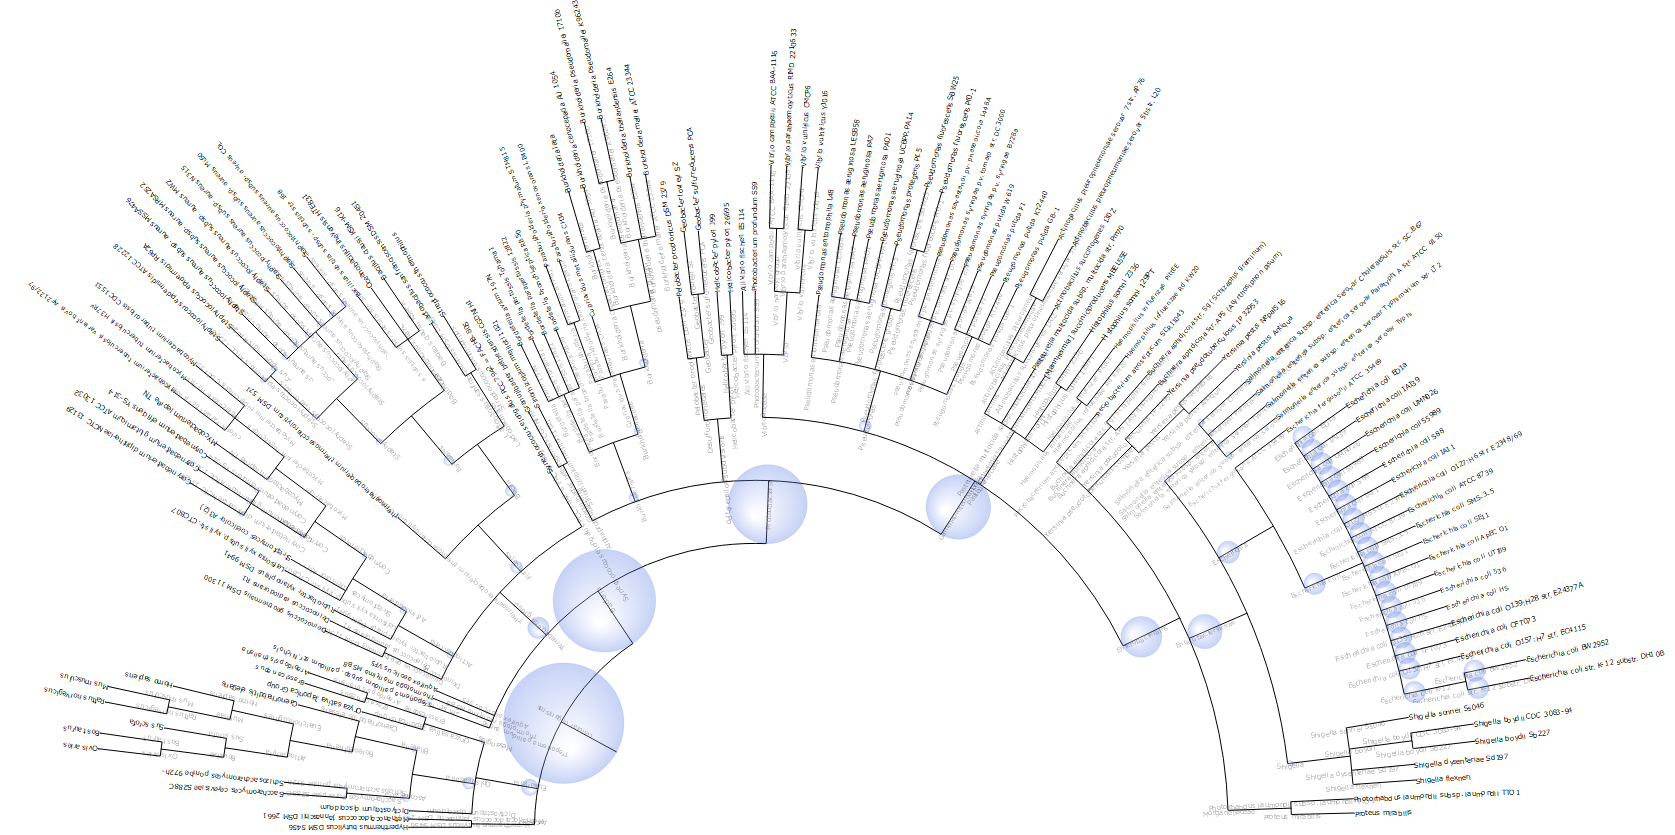

In [ ]:
from IPython.display import Image
Image(filename=datapath2+'phyliptree.PNG', width=2000)

# Functional characterization

In [ ]:
# Point Colaboratory to your Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# datapath = '/content/gdrive/My Drive/^DATA SCIENCE/^Biological Data/PROJECT/models/' # Luca
# datapath = '/content/gdrive/My Drive/Data Science - Unipd/II Year/I Semester/Biological Data/Project/PROJECT/models/' # Giuliano
# datapath = '/content/gdrive/My Drive/PROJECT/models/' # Francesco

datapath = '/content/gdrive/My Drive/MODIFY_THIS_PART_ACCORDING_TO_YOUR_PATH/PROJECT/models/' # PROFESSOR

In [ ]:
# datapath2 = '/content/gdrive/My Drive/^DATA SCIENCE/^Biological Data/PROJECT/structure/' # Luca
# datapath2 = '/content/gdrive/My Drive/Data Science - Unipd/II Year/I Semester/Biological Data/Project/PROJECT/structure/' # Giuliano
# datapath2 = '/content/gdrive/My Drive/PROJECT/structure/' # Francesco

datapath2 = '/content/gdrive/My Drive/MODIFY_THIS_PART_ACCORDING_TO_YOUR_PATH/PROJECT/structure/' # PROFESSOR

In [ ]:
# datapath3 = '/content/gdrive/My Drive/^DATA SCIENCE/^Biological Data/PROJECT/function/' # Luca
# datapath3 = '/content/gdrive/My Drive/Data Science - Unipd/II Year/I Semester/Biological Data/Project/PROJECT/function/' # Giuliano
# datapath3 = '/content/gdrive/My Drive/PROJECT/function/' # Francesco

datapath3 = '/content/gdrive/My Drive/MODIFY_THIS_PART_ACCORDING_TO_YOUR_PATH/PROJECT/function/' # PROFESSOR

## Ex 10: GO annotations

It uses the files 


*   go.obo
* parse_go_obo.py
*   swissprot_goa.tab.gz

__note:__ _if it does not work the import of `parse_go_obo` create a cell before the import cell with the following command_: 

`%cd /content/gdrive/My Drive/MODIFY_THIS_PART_ACCORDING_TO_YOUR_PATH/PROJECT/function/`

In [ ]:
import sys
sys.path.append(datapath3)

In [ ]:
import gzip
import copy
import parse_go_obo

# path_gaf = "goa_human.gaf.gz"
path_spgoa = datapath3+"swissprot_goa.tab.gz"

In [ ]:
# Get ontology data from parse_go_obo lib
graph = parse_go_obo.parse_obo(datapath3+"go.obo")
ancestors, depth, roots = parse_go_obo.get_ancestors(graph)
children = parse_go_obo.get_children(ancestors)

In [ ]:
# dataset = ['Q8FTH8', 'Q5M731', 'P99124', 'P66915', 'Q8NVH3', 'Q6G7L7', 'Q6GEY2', 'P61422', 'P76422', 'P56904', 'O48881', 'P55882', 'O67772', 'O31620', 'P44697', 'Q9ZBL1', 'O94266', 'Q2QWK9', 'Q8NQH1', 'O25515', 'Q9ZL00', 'Q9ZBR6', 'Q08975', 'Q06490', 'Q08224', 'P39610', 'P9WG77', 'P9WG76', 'P66914', 'Q5HI96', 'Q5HRG7', 'Q8CTQ7', 'O85786', 'Q9USL6', 'O94265', 'Q9WZP7', 'Q57688', 'O83153', 'P40191', 'B1IX53', 'A8A2R4', 'B1XA89', 'C4ZVU9', 'B7LL66', 'Q83K78', 'B7NPV5', 'Q3YZC3', 'B6I4Z5', 'B7M6S8', 'B7UGB9', 'A7ZPL9', 'B2TX08', 'Q1R8V2', 'Q8FFB5', 'Q0TF48', 'A1ADT5', 'B7MY71', 'B7MHS2', 'B7N609', 'Q32DD5', 'B7LCG3', 'B5YZW5', 'Q8XBL0', 'B1LML3', 'O01824', 'Q0BSF0', 'P44690', 'A5UA83', 'Q1LFU5', 'Q1CIM6', 'Q7CIR8', 'Q1C792', 'Q66A50', 'Q1J237', 'Q7MGA4', 'Q8D4Q2', 'Q87FP6', 'Q5PNC8', 'A7N5Q6', 'Q9CNY1', 'P40192', 'Q57LS3', 'Q8Z4W1', 'Q9RYX0', 'Q2L1P5', 'Q6LP62', 'A6VNE5', 'B3H2H2', 'B0UUD2', 'Q0I3D2', 'Q7N3W7', 'A3N2D3', 'Q51892', 'Q8ZPM8', 'Q57PI7', 'Q65UE8', 'Q5PIK8', 'Q6AFC1', 'Q02DJ3', 'Q1I2L8', 'Q6NG19', 'Q83KY1', 'A6VEZ4', 'Q88C26', 'A5WB73', 'Q32FD7', 'Q1RBF9', 'Q0THJ1', 'Q8FH89', 'Q8X649', 'Q320Z3', 'P77150', 'Q5E345', 'Q9HT57', 'B7V753', 'B0KR83', 'Q3Z1Z2', 'Q6D5V1', 'B1JFM7', 'Q7W6K7', 'Q7WII1', 'Q48BL6', 'B2JCI0', 'Q7VYK4', 'C3K4G7', 'Q87TZ6', 'Q63SC2', 'Q2SXQ4', 'Q3JQA6', 'Q39I40', 'Q4K3F6', 'Q1BXQ7', 'Q3K4B8', 'Q1AYE5', 'Q62LP6', 'Q141E8', 'Q4ZL75', 'Q8Z6Q3', 'O46560', 'P82197', 'Q8W1X2', 'O00764', 'Q0II59', 'O35331', 'Q8K183', 'O74860', 'O14242', 'P39988', 'Q55EK9', 'P53727', 'P0A9J6', 'P0A9J7', 'Q8ESZ2', 'P77493', 'A1A6H3', 'P57168', 'P36945', 'D9TT10', 'B3E5M9', 'P83534', 'Q8KA54', 'Q5WKY9', 'Q48P39', 'Q87VF4', 'P96051', 'A1AV12', 'P50845', 'A2BLC0']
# Load the list of sequence id
with open(datapath2+'dataset_bestmodel.txt') as f:
    dataset = f.read().splitlines()
print(dataset)

['Q8FTH8', 'Q5M731', 'P99124', 'P66915', 'Q8NVH3', 'Q6G7L7', 'Q6GEY2', 'P61422', 'P76422', 'P56904', 'O48881', 'P55882', 'O67772', 'O31620', 'P44697', 'Q9ZBL1', 'O94266', 'Q2QWK9', 'Q8NQH1', 'O25515', 'Q9ZL00', 'Q9ZBR6', 'Q08975', 'Q06490', 'Q08224', 'P39610', 'P9WG77', 'P9WG76', 'P66914', 'Q5HI96', 'Q5HRG7', 'Q8CTQ7', 'O85786', 'Q9USL6', 'O94265', 'Q9WZP7', 'Q57688', 'O83153', 'P40191', 'B1IX53', 'A8A2R4', 'B1XA89', 'C4ZVU9', 'B7LL66', 'Q83K78', 'B7NPV5', 'Q3YZC3', 'B6I4Z5', 'B7M6S8', 'B7UGB9', 'A7ZPL9', 'B2TX08', 'Q1R8V2', 'Q8FFB5', 'Q0TF48', 'A1ADT5', 'B7MY71', 'B7MHS2', 'B7N609', 'Q32DD5', 'B7LCG3', 'B5YZW5', 'Q8XBL0', 'B1LML3', 'O01824', 'Q0BSF0', 'P44690', 'A5UA83', 'Q1LFU5', 'Q1CIM6', 'Q7CIR8', 'Q1C792', 'Q66A50', 'Q1J237', 'Q7MGA4', 'Q8D4Q2', 'Q87FP6', 'Q5PNC8', 'A7N5Q6', 'Q9CNY1', 'P40192', 'Q57LS3', 'Q8Z4W1', 'Q9RYX0', 'Q2L1P5', 'Q6LP62', 'A6VNE5', 'B3H2H2', 'B0UUD2', 'Q0I3D2', 'Q7N3W7', 'A3N2D3', 'Q51892', 'Q8ZPM8', 'Q57PI7', 'Q65UE8', 'Q5PIK8', 'Q6AFC1', 'Q02DJ3', 'Q1I2L8',

##### GO statistics

In [ ]:
go_map = {} 
# key = Uniprot ID, value = set of GO terms associated

# with open(path_spgoa, 'r') as f:
with gzip.open(path_spgoa) as f:
    # i=0
    for line in f:
        line = line.decode()
        # if i<10:
        if line and not line.startswith('Entry'):
            # print(line)
            line=line.replace(';', '')
            line=line.replace('\n', '')
            name, annotations = line.split("\t")
            # print(term)
            annotations_list = annotations.split(' ')
            # print(chuck)
            go_map[name] = set(annotations_list)
            # i+=1


In [ ]:
go_map

{'P37256': {'GO:0009535', 'GO:0009539', 'GO:0015979', 'GO:0016021'},
 'Q1RHU4': {'GO:0003883',
  'GO:0005524',
  'GO:0006541',
  'GO:0044210',
  'GO:0046872'},
 'Q46GQ4': {'GO:0005524', 'GO:0005737', 'GO:0033862', 'GO:0044210'},
 'Q4WAZ9': {'GO:0004315',
  'GO:0006633',
  'GO:0016874',
  'GO:0019184',
  'GO:0019748',
  'GO:0031177',
  'GO:0044550',
  'GO:1900790'},
 'P08938': {'GO:0016918', 'GO:0019841', 'GO:0033165', 'GO:0034632'},
 'A7MQG0': {'GO:0004070',
  'GO:0006207',
  'GO:0006520',
  'GO:0016597',
  'GO:0044205'},
 'Q7CNB0': {'GO:0004151', 'GO:0008270', 'GO:0044205'},
 'Q5P6I4': {'GO:0004070',
  'GO:0006207',
  'GO:0006520',
  'GO:0016597',
  'GO:0044205'},
 'Q7MLX2': {'GO:0004590', 'GO:0006207', 'GO:0044205'},
 'Q47TL8': {'GO:0000287',
  'GO:0004642',
  'GO:0005524',
  'GO:0005737',
  'GO:0006189'},
 'Q3SFS1': {'GO:0004070',
  'GO:0006207',
  'GO:0006520',
  'GO:0016597',
  'GO:0044205'},
 'Q8SQI7': {'GO:0003883', 'GO:0005524', 'GO:0006541', 'GO:0044210'},
 'B2HR69': {'GO:0003

In [ ]:
annotations_my_proteins = []#list of annotations (GO terms) associated with everyone of the proteins in family_sequence
annotations_rest = []

# with gzip.open("./data/function/goa_human.gaf.gz") as f:
# with gzip.open(path_spgoa) as f:
#     for acc, annotations in gen_block(f):

for acc, annotations in go_map.items():

    # For each term add protein accession to proteins dict
    if acc in dataset:
        for term in annotations:
            annotations_my_proteins.append(term)
    else:
        for term in annotations:
            annotations_rest.append(term)

In [ ]:
print(f'Annotations associated with my list of proteins: {len(annotations_my_proteins)}') 
print(f'Annotations associated with the rest of proteins: {len(annotations_rest)}')

Annotations associated with my list of proteins: 907
Annotations associated with the rest of proteins: 3098375


In [ ]:
print(f'Distinct GO terms associated with my list of proteins: {len(set(annotations_my_proteins))}') 
print(f'Distinct GO terms associated with the rest of proteins: {len(set(annotations_rest))}') 

Distinct GO terms associated with my list of proteins: 75
Distinct GO terms associated with the rest of proteins: 28644


In [ ]:
# Count leaves without repetitions
leaves = 0
for term in set(annotations_my_proteins):
    if term not in children.keys():#children.keys=parents
        leaves += 1
print(f'Leaves associated with my proteins: {leaves} (without repetitions)')

Leaves associated with my proteins: 40 (without repetitions)


##### Most abundant GO terms 

After integrating ancestors terms

In [ ]:
terms_count = {}  # { term : count } count within my list of proteins

for acc, annotations in go_map.items():
    if acc in dataset:
        # Copy direct annotations
        terms = copy.copy(annotations)
        # Add ancestors
        for term in annotations:
            terms.update(ancestors.get(term, set()))
        # For each term add protein accession to terms_count dict
        for term in terms:
            terms_count.setdefault(term, 0)
            terms_count[term] += 1

In [ ]:
# Sort by count and filter by biological_process namespace
data = sorted([(k, v) for k, v in terms_count.items()], key=lambda x: x[1], reverse=True)
for namespace in ['molecular_function', 'biological_process', 'cellular_component']:
    print(namespace)
    for (k, v) in list(filter(lambda x: graph[x[0]]["namespace"] == namespace, data))[:10]:
        print(k, v, graph[k]["def"])
    print()

molecular_function
GO:0003674 168 molecular_function
GO:0003824 168 catalytic activity
GO:0016772 166 transferase activity, transferring phosphorus-containing groups
GO:0016773 166 phosphotransferase activity, alcohol group as acceptor
GO:0016301 166 kinase activity
GO:0016740 166 transferase activity
GO:0036094 164 small molecule binding
GO:0032553 164 ribonucleotide binding
GO:0032559 164 adenyl ribonucleotide binding
GO:0043167 164 ion binding

biological_process
GO:0008152 165 metabolic process
GO:0008150 165 biological_process
GO:0071704 165 organic substance metabolic process
GO:0044281 163 small molecule metabolic process
GO:0009987 160 cellular process
GO:0044237 160 cellular metabolic process
GO:0046483 158 heterocycle metabolic process
GO:1901360 158 organic cyclic compound metabolic process
GO:0006725 158 cellular aromatic compound metabolic process
GO:0006807 158 nitrogen compound metabolic process

cellular_component
GO:0110165 46 cellular anatomical entity
GO:0005575 46 c

## Ex 11: Enriched terms

##### Enriched terms - fold increase

In [ ]:
terms_set = {}  # { term : count }  dataset proteins
terms_rest = {}  #  { term : count }  other proteins
proteins_set = 0  # number of dataset proteins
proteins_rest = 0  # number of remaining proteins

for acc, annotations in go_map.items():
    # Copy direct annotations
    terms = copy.copy(annotations)

    # Add ancestors
    for term in annotations:
        terms.update(ancestors.get(term, set()))

    # For each term add protein accession to proteins dict
    if acc in dataset:
        proteins_set += 1
        for term in terms:
            terms_set.setdefault(term, 0)
            terms_set[term] += 1
    else:
        proteins_rest += 1
        for term in terms:
            terms_rest.setdefault(term, 0)
            terms_rest[term] += 1

In [ ]:
eps = 1 # 1e-10 
data = []
for term in terms_set: # it is enought to consider the GO terms present in terms_set, because the others have increase 0.
    ratio_set = terms_set[term]+1 / (proteins_set - terms_set[term] + 1) 
    ratio_rest = (terms_rest.get(term, 1)) / (proteins_rest - terms_rest.get(term, 0) + 1)
    fold_increase = ratio_set / ratio_rest
    data.append((term, terms_set.get(term, 0), terms_rest.get(term, 0), ratio_set, ratio_rest, fold_increase,
                 graph[term]["namespace"], graph[term]["def"]))

In [ ]:
print(f'Number of terms with fold increase larger than 1: {len(list(filter(lambda x: x[5] > 1 , data)))}')

for namespace in ['molecular_function', 'biological_process', 'cellular_component']:
    print()
    print(namespace)
    data_sub = list(filter(lambda x: x[6] == namespace, data))
    for ele in sorted(data_sub, key=lambda x: x[5], reverse=True)[:10]:
        print(f"{ele[0]}, fold increase={round(ele[5], 2):}, {ele[7]}")
        # print(f"{ele[0]} in {ele[1]:3} of my proteins, in {ele[2]:2} of other proteins, increase={round(ele[5], 2):8}, {ele[7]}")


Number of terms with fold increase larger than 1: 292

molecular_function
GO:0008478, fold increase=65976027.4, pyridoxal kinase activity
GO:0008972, fold increase=21428855.85, phosphomethylpyrimidine kinase activity
GO:0008902, fold increase=20301219.14, hydroxymethylpyrimidine kinase activity
GO:0004747, fold increase=282241.28, ribokinase activity
GO:0031403, fold increase=169478.14, lithium ion binding
GO:0070280, fold increase=161567.43, pyridoxal binding
GO:0050334, fold increase=77033.88, thiaminase activity
GO:0008673, fold increase=56715.09, 2-dehydro-3-deoxygluconokinase activity
GO:0031402, fold increase=23867.58, sodium ion binding
GO:0047590, fold increase=18904.36, 5-dehydro-2-deoxygluconokinase activity

biological_process
GO:0009443, fold increase=15788900.81, pyridoxal 5'-phosphate salvage
GO:0009230, fold increase=567159.98, thiamine catabolic process
GO:0042725, fold increase=567159.98, thiamine-containing compound catabolic process
GO:0010054, fold increase=283579.4

##### Enriched terms - fisher test

In [ ]:
!pip install fisher

     |████████████████████████████████| 153kB 5.8MB/s 
  Created wheel for fisher: filename=fisher-0.1.9-cp36-cp36m-linux_x86_64.whl size=296981 sha256=e2f90741df804bcde87241c7baa63f57f67fdfc3418f9c5085ca0a7d16c0fe00
  Stored in directory: /root/.cache/pip/wheels/31/8f/38/afe68425deaf5d2e62578ab3b2b503906f3b4282d65cf8cafb
Successfully built fisher


In [ ]:
from fisher import pvalue

In [ ]:
eps = 1 
data = []
for term in terms_set.keys(): # it is enought to consider the GO terms present in terms_set, because the others have increase 0.
    
    ratio_set = (terms_set[term]+1) / (proteins_set - terms_set[term] + 1) 
    ratio_rest = (terms_rest.get(term, 1)) / (proteins_rest - terms_rest.get(term, 0) +1)
    fold_increase = ratio_set / (ratio_rest)
    p = pvalue(terms_set[term]+1, 
               proteins_set - terms_set[term] +1,
               terms_rest.get(term, 1), 
               proteins_rest - terms_rest.get(term, 0)+1)
    data.append((term, terms_set.get(term, 0), terms_rest.get(term, 0), fold_increase, p.left_tail, p.right_tail, p.two_tail, graph[term]["namespace"], graph[term]["def"]))

In [ ]:
# prof output 
for namespace in ['molecular_function', 'biological_process', 'cellular_component']:
    print()
    print(namespace)
    data_sub = list(filter(lambda x: x[7] == namespace, data))
    for ele in sorted(data_sub, key=lambda x: x[5], reverse=False)[:10]:
        # print(f"{ele[0]} in {ele[1]:3} of my proteins, in {ele[2]:4} of other proteins, increase={round(ele[3], 2):8}, p.left_tail={ele[4]:.5}, p.right_tail={ele[5]:.5}, p.two_tail={ele[6]:.5}, {ele[7]}")
        print(f"{ele[0]} fold_increase={round(ele[3], 2):g}, p.left={ele[4]:}, p.right={ele[5]:g}, p.two={ele[6]:g}, {ele[8]}")
# the interesting p-value is the right_tail


molecular_function
GO:0008478 fold_increase=1.2794e+06, p.left=0.9999999987396537, p.right=0, p.two=6.15785e-08, pyridoxal kinase activity
GO:0016773 fold_increase=2158.14, p.left=0.9999999998454722, p.right=1.46361e-261, p.two=4.27357e-07, phosphotransferase activity, alcohol group as acceptor
GO:0016301 fold_increase=1388.92, p.left=0.999999999539557, p.right=9.12439e-231, p.two=8.76002e-07, kinase activity
GO:0016772 fold_increase=755.34, p.left=0.9999999999069028, p.right=4.64255e-189, p.two=6.35112e-07, transferase activity, transferring phosphorus-containing groups
GO:0008972 fold_increase=167850, p.left=0.9999999987601894, p.right=1.72272e-138, p.two=2.63667e-07, phosphomethylpyrimidine kinase activity
GO:0008902 fold_increase=156848, p.left=0.9999999992763147, p.right=2.96446e-131, p.two=2.2523e-07, hydroxymethylpyrimidine kinase activity
GO:0005524 fold_increase=178.15, p.left=1.0, p.right=5.43919e-125, p.two=1.21648e-06, ATP binding
GO:0032559 fold_increase=176.74, p.left=1.

In [ ]:
import pandas as pd

In [ ]:
go_dataset = pd.DataFrame(data, columns=['GO term', 
                            'set_freq', # number of sequences in our set with that GO annotation
                            'rest_freq', # number of sequences NOT in our set with that GO annotation
                            'fold_increase', 
                            'p.left_tail', 'p.right_tail', 'p.two_tail', 
                            'namespace', # sub-ontology
                            'def'])
go_dataset

,GO term,set_freq,rest_freq,fold_increase,p.left_tail,p.right_tail,p.two_tail,namespace,def
0,GO:0036094,164,133745,106.112228,1.000000,2.489800e-95,2.093740e-06,molecular_function,small molecule binding
1,GO:0009987,160,387308,8.152001,1.000000,4.848483e-17,2.760913e-06,biological_process,cellular process
2,GO:0042364,151,10491,445.375020,1.000000,1.784115e-239,1.009400e-06,biological_process,water-soluble vitamin biosynthetic process
3,GO:0008902,36,0,156848.007519,1.000000,2.964460e-131,2.252302e-07,molecular_function,hydroxymethylpyrimidine kinase activity
4,GO:0044249,155,178184,24.115070,1.000000,5.417710e-61,1.932307e-06,biological_process,cellular biosynthetic process
...,...,...,...,...,...,...,...,...,...
287,GO:0019310,1,224,29.952222,0.999951,2.196884e-03,2.196884e-03,biological_process,inositol catabolic process
288,GO:0046164,1,1636,4.090763,0.986262,8.806759e-02,8.806759e-02,biological_process,alcohol catabolic process
289,GO:0044275,1,2233,2.993901,0.969308,1.464759e-01,1.464759e-01,biological_process,cellular carbohydrate catabolic process
290,GO:0044262,1,9000,0.733869,0.488899,7.562990e-01,1.000000e+00,biological_process,cellular carbohydrate metabolic process


In [ ]:
# go_dataset.to_csv(datapath3+'go_dataset.csv')

## Ex 12: word cloud

In [ ]:
go_dataset = pd.read_csv(datapath3+'go_dataset.csv', header=0, index_col=0)

In [ ]:
go_dataset.sort_values(by=['p.right_tail'], inplace=True)

In [ ]:
go_dataset

,GO term,set_freq,rest_freq,fold_increase,p.left_tail,p.right_tail,p.two_tail,namespace,def
110,GO:0009443,112,4,2.794277e+05,1.000000e+00,0.000000e+00,5.751883e-08,biological_process,pyridoxal 5'-phosphate salvage
99,GO:0008478,117,0,1.279404e+06,1.000000e+00,0.000000e+00,6.157847e-08,molecular_function,pyridoxal kinase activity
97,GO:0042823,112,713,1.565645e+03,1.000000e+00,1.304094e-278,2.423310e-07,biological_process,pyridoxal phosphate biosynthetic process
105,GO:0042822,112,718,1.554729e+03,1.000000e+00,2.712061e-278,2.509821e-07,biological_process,pyridoxal phosphate metabolic process
98,GO:0046184,112,1021,1.092747e+03,1.000000e+00,4.324871e-262,7.049811e-08,biological_process,aldehyde biosynthetic process
...,...,...,...,...,...,...,...,...,...
70,GO:0005575,46,414979,1.370394e-01,1.081065e-35,1.000000e+00,1.903249e-06,cellular_component,cellular_component
64,GO:0044238,14,263111,1.105975e-01,6.919546e-27,1.000000e+00,3.146383e-06,biological_process,primary metabolic process
128,GO:0065007,2,92541,9.148183e-02,3.886076e-10,1.000000e+00,2.028300e-06,biological_process,biological regulation
68,GO:0110165,46,384865,1.776609e-01,2.272324e-27,1.000000e+00,2.008672e-06,cellular_component,cellular anatomical entity


Note that in *go_dataset* each *def* is unique:

In [ ]:
dict_freq={}
for term in go_dataset['def']:
  dict_freq[term]=dict_freq.setdefault(term,0)+1
len(dict_freq)

292

Compute the dictionary: 

- def : $\log\bigg(\frac{1}{\text{p.right_tail}}\bigg)$ 

in such way the *value* is inversaly proportional to the *p.right_tail* and the $\log$ slows down the decline of the ratio as *p.right_tail* increases.


In [ ]:
import numpy as np
dict_right_pvalue={}
for term in go_dataset['def']:
  right_pvalue=go_dataset.loc[go_dataset['def']==term]['p.right_tail'].values[0]
  if right_pvalue==0:
    right_pvalue=1e-300#to avoid later division by zero
  dict_right_pvalue[term]=np.log(1/(right_pvalue))
len(dict_right_pvalue)

292

In [ ]:
dict_right_pvalue["sulfur compound biosynthetic process"]

66.38241787627834

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt

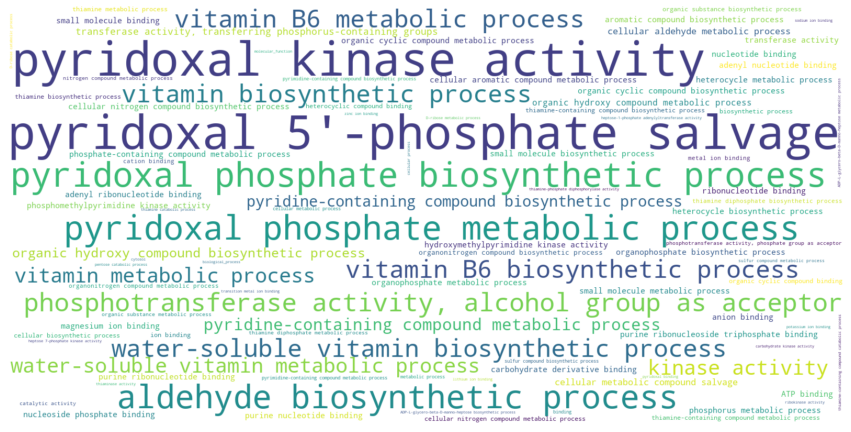

In [ ]:
wordcloud = WordCloud(background_color="white", width=1600, height=800, max_words=100, 
                      collocations=True).generate_from_frequencies(dict_right_pvalue)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

## Ex 13: enriched branches

In [ ]:
list_parents=[]#collects all GO terms (in all subontologies) which are not child(=parents)
for term in set(annotations_my_proteins):
    if term in children.keys():#children.keys=parents
        list_parents.append(term)

In [ ]:
len(list_parents)

35

In [ ]:
list_parents[0]

'GO:0007049'

Print, for each subontology, GO terms which are:

- not leaves
- most enriched


In [ ]:
for namespace in ['molecular_function', 'biological_process', 'cellular_component']:
    print()
    print(namespace)
    data_sub = list(filter(lambda x: x[7] == namespace, data))#filter by subontology
    data_sub2 = list(filter(lambda x: x[0] in (list_parents), data_sub))#filter by parents
    for ele in sorted(data_sub2, key=lambda x: x[5], reverse=False)[:10]:
      print(f"{ele[0]}, p.right={ele[5]:g}, def={ele[8]}")


molecular_function
GO:0016773, p.right=1.46361e-261, def=phosphotransferase activity, alcohol group as acceptor
GO:0016301, p.right=9.12439e-231, def=kinase activity
GO:0046872, p.right=1.10205e-50, def=metal ion binding
GO:0008270, p.right=1.85521e-18, def=zinc ion binding
GO:0008144, p.right=0.000696076, def=drug binding
GO:0016779, p.right=0.162941, def=nucleotidyltransferase activity
GO:0042802, p.right=0.222004, def=identical protein binding

biological_process
GO:0009443, p.right=0, def=pyridoxal 5'-phosphate salvage
GO:0042823, p.right=1.30409e-278, def=pyridoxal phosphate biosynthetic process
GO:0042819, p.right=2.05907e-237, def=vitamin B6 biosynthetic process
GO:0042816, p.right=6.39728e-237, def=vitamin B6 metabolic process
GO:0009228, p.right=5.31687e-56, def=thiamine biosynthetic process
GO:0042817, p.right=9.0273e-07, def=pyridoxal metabolic process
GO:0017085, p.right=0.000142596, def=response to insecticide
GO:0042538, p.right=0.000640476, def=hyperosmotic salinity res